## Analysis of IQR method 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
## define color palettes
dutchfield = ["#e60049", "#0bb4ff", "#87bc45", "#ef9b20", "#b33dc6"]
springpastel = ["#fd7f6f", "#7eb0d5", "#b2e061", "#bd7ebe", "#ffb55a"] 

In [3]:
# load the counts
# site_counts = pd.read_csv('/scratch/users/ntu/suffiazi/outputs/tmp/plotting-parallel/output-data/concat_tables/1360_motifs_variable_site_counts-sorted.tsv', sep='\t')
site_counts = pd.read_csv('/data5/msazizan/plotting_data/IQR-region-counts/1360_motifs_variable_site_counts-sorted.tsv', sep='\t')
site_counts

motif_id      sample_id  max_AF_region_count  \
0     AHR_AHR_HUMAN.H11MO.0.B   S6R691V_her2                    4   
1     AHR_AHR_HUMAN.H11MO.0.B   PU24GB8_lumB                    4   
2     AHR_AHR_HUMAN.H11MO.0.B  ANAB5F7_basal                    4   
3     AHR_AHR_HUMAN.H11MO.0.B   98JKPD8_lumA                    4   
4     AHR_AHR_HUMAN.H11MO.0.B   2GAMBDQ_norm                    9   
...                       ...            ...                  ...   
6795      ZSCAN5C_M08390_2.00   S6R691V_her2                    9   
6796      ZSCAN5C_M08390_2.00   PU24GB8_lumB                    5   
6797      ZSCAN5C_M08390_2.00  ANAB5F7_basal                    7   
6798      ZSCAN5C_M08390_2.00   98JKPD8_lumA                   14   
6799      ZSCAN5C_M08390_2.00   2GAMBDQ_norm                   29   

      max_FPS_region_count  
0                        3  
1                        0  
2                       17  
3                        4  
4                        1  
...                    ...  
6795                    14  
6796                     4  
6797                    28  
6798                    16  
6799                     2  

[6800 rows x 4 columns]

In [4]:
# sort sample_id column naturally, by motif_id grouping
site_counts_sorted = site_counts.sort_values(by=['motif_id', 'sample_id'])
site_counts_sorted

motif_id      sample_id  max_AF_region_count  \
4     AHR_AHR_HUMAN.H11MO.0.B   2GAMBDQ_norm                    9   
3     AHR_AHR_HUMAN.H11MO.0.B   98JKPD8_lumA                    4   
2     AHR_AHR_HUMAN.H11MO.0.B  ANAB5F7_basal                    4   
1     AHR_AHR_HUMAN.H11MO.0.B   PU24GB8_lumB                    4   
0     AHR_AHR_HUMAN.H11MO.0.B   S6R691V_her2                    4   
...                       ...            ...                  ...   
6799      ZSCAN5C_M08390_2.00   2GAMBDQ_norm                   29   
6798      ZSCAN5C_M08390_2.00   98JKPD8_lumA                   14   
6797      ZSCAN5C_M08390_2.00  ANAB5F7_basal                    7   
6796      ZSCAN5C_M08390_2.00   PU24GB8_lumB                    5   
6795      ZSCAN5C_M08390_2.00   S6R691V_her2                    9   

      max_FPS_region_count  
4                        1  
3                        4  
2                       17  
1                        0  
0                        3  
...                    ...  
6799                     2  
6798                    16  
6797                    28  
6796                     4  
6795                    14  

[6800 rows x 4 columns]

In [5]:
# sum the total filtered sites where FPS variance is considered outliers, based on AF variance 
sumsite_af_sorted_df = site_counts_sorted.groupby('motif_id')['max_AF_region_count'].sum().sort_values(ascending=False).to_frame()
sumsite_af_sorted_df

max_AF_region_count
motif_id                                        
ZNF287_M07590_2.00                          1175
ZNF235_M07605_2.00                          1147
ZNF432_M07773_2.00                          1073
ZN770_ZN770_HUMAN.H11MO.0.C                 1032
MAZ_MAZ_HUMAN.H11MO.0.A                      998
...                                          ...
ZNF211_M07577_2.00                            14
ZNF547_M07600_2.00                            13
NOBOX_NOBOX_HUMAN.H11MO.0.C                   13
ZNF777_M07703_2.00                             3
ZNF669_M08262_2.00                             2

[1360 rows x 1 columns]

In [6]:
# set categorical order for motif_id
site_counts_sorted['motif_id'] = pd.Categorical(site_counts_sorted['motif_id'], categories=sumsite_af_sorted_df.index, ordered=True)
site_counts_sorted = site_counts_sorted.sort_values(['motif_id', 'sample_id'])
site_counts_sorted

motif_id      sample_id  max_AF_region_count  \
5354  ZNF287_M07590_2.00   2GAMBDQ_norm                  453   
5350  ZNF287_M07590_2.00   98JKPD8_lumA                  265   
5351  ZNF287_M07590_2.00  ANAB5F7_basal                  153   
5352  ZNF287_M07590_2.00   PU24GB8_lumB                  170   
5353  ZNF287_M07590_2.00   S6R691V_her2                  134   
...                  ...            ...                  ...   
6270  ZNF669_M08262_2.00   2GAMBDQ_norm                    0   
6271  ZNF669_M08262_2.00   98JKPD8_lumA                    1   
6272  ZNF669_M08262_2.00  ANAB5F7_basal                    1   
6273  ZNF669_M08262_2.00   PU24GB8_lumB                    0   
6274  ZNF669_M08262_2.00   S6R691V_her2                    0   

      max_FPS_region_count  
5354                    61  
5350                   386  
5351                   500  
5352                    78  
5353                   150  
...                    ...  
6270                     0  
6271                     0  
6272                     2  
6273                     0  
6274                     0  

[6800 rows x 4 columns]

In [7]:
# Pivot the DataFrame so that each 'sample_id' is a column
pivot_df = site_counts_sorted.pivot(index='motif_id', columns='sample_id', values='max_AF_region_count').fillna(0)
pivot_df

sample_id                    2GAMBDQ_norm  98JKPD8_lumA  ANAB5F7_basal  \
motif_id                                                                 
ZNF287_M07590_2.00                    453           265            153   
ZNF235_M07605_2.00                    430           251            158   
ZNF432_M07773_2.00                    398           229            153   
ZN770_ZN770_HUMAN.H11MO.0.C           407           209            144   
MAZ_MAZ_HUMAN.H11MO.0.A               384           220            148   
...                                   ...           ...            ...   
ZNF211_M07577_2.00                      6             3              3   
ZNF547_M07600_2.00                      4             3              1   
NOBOX_NOBOX_HUMAN.H11MO.0.C             6             2              2   
ZNF777_M07703_2.00                      2             1              0   
ZNF669_M08262_2.00                      0             1              1   

sample_id                    PU24GB8_lumB  S6R691V_her2  
motif_id                                                 
ZNF287_M07590_2.00                    170           134  
ZNF235_M07605_2.00                    162           146  
ZNF432_M07773_2.00                    134           159  
ZN770_ZN770_HUMAN.H11MO.0.C           131           141  
MAZ_MAZ_HUMAN.H11MO.0.A               116           130  
...                                   ...           ...  
ZNF211_M07577_2.00                      1             1  
ZNF547_M07600_2.00                      2             3  
NOBOX_NOBOX_HUMAN.H11MO.0.C             2             1  
ZNF777_M07703_2.00                      0             0  
ZNF669_M08262_2.00                      0             0  

[1360 rows x 5 columns]

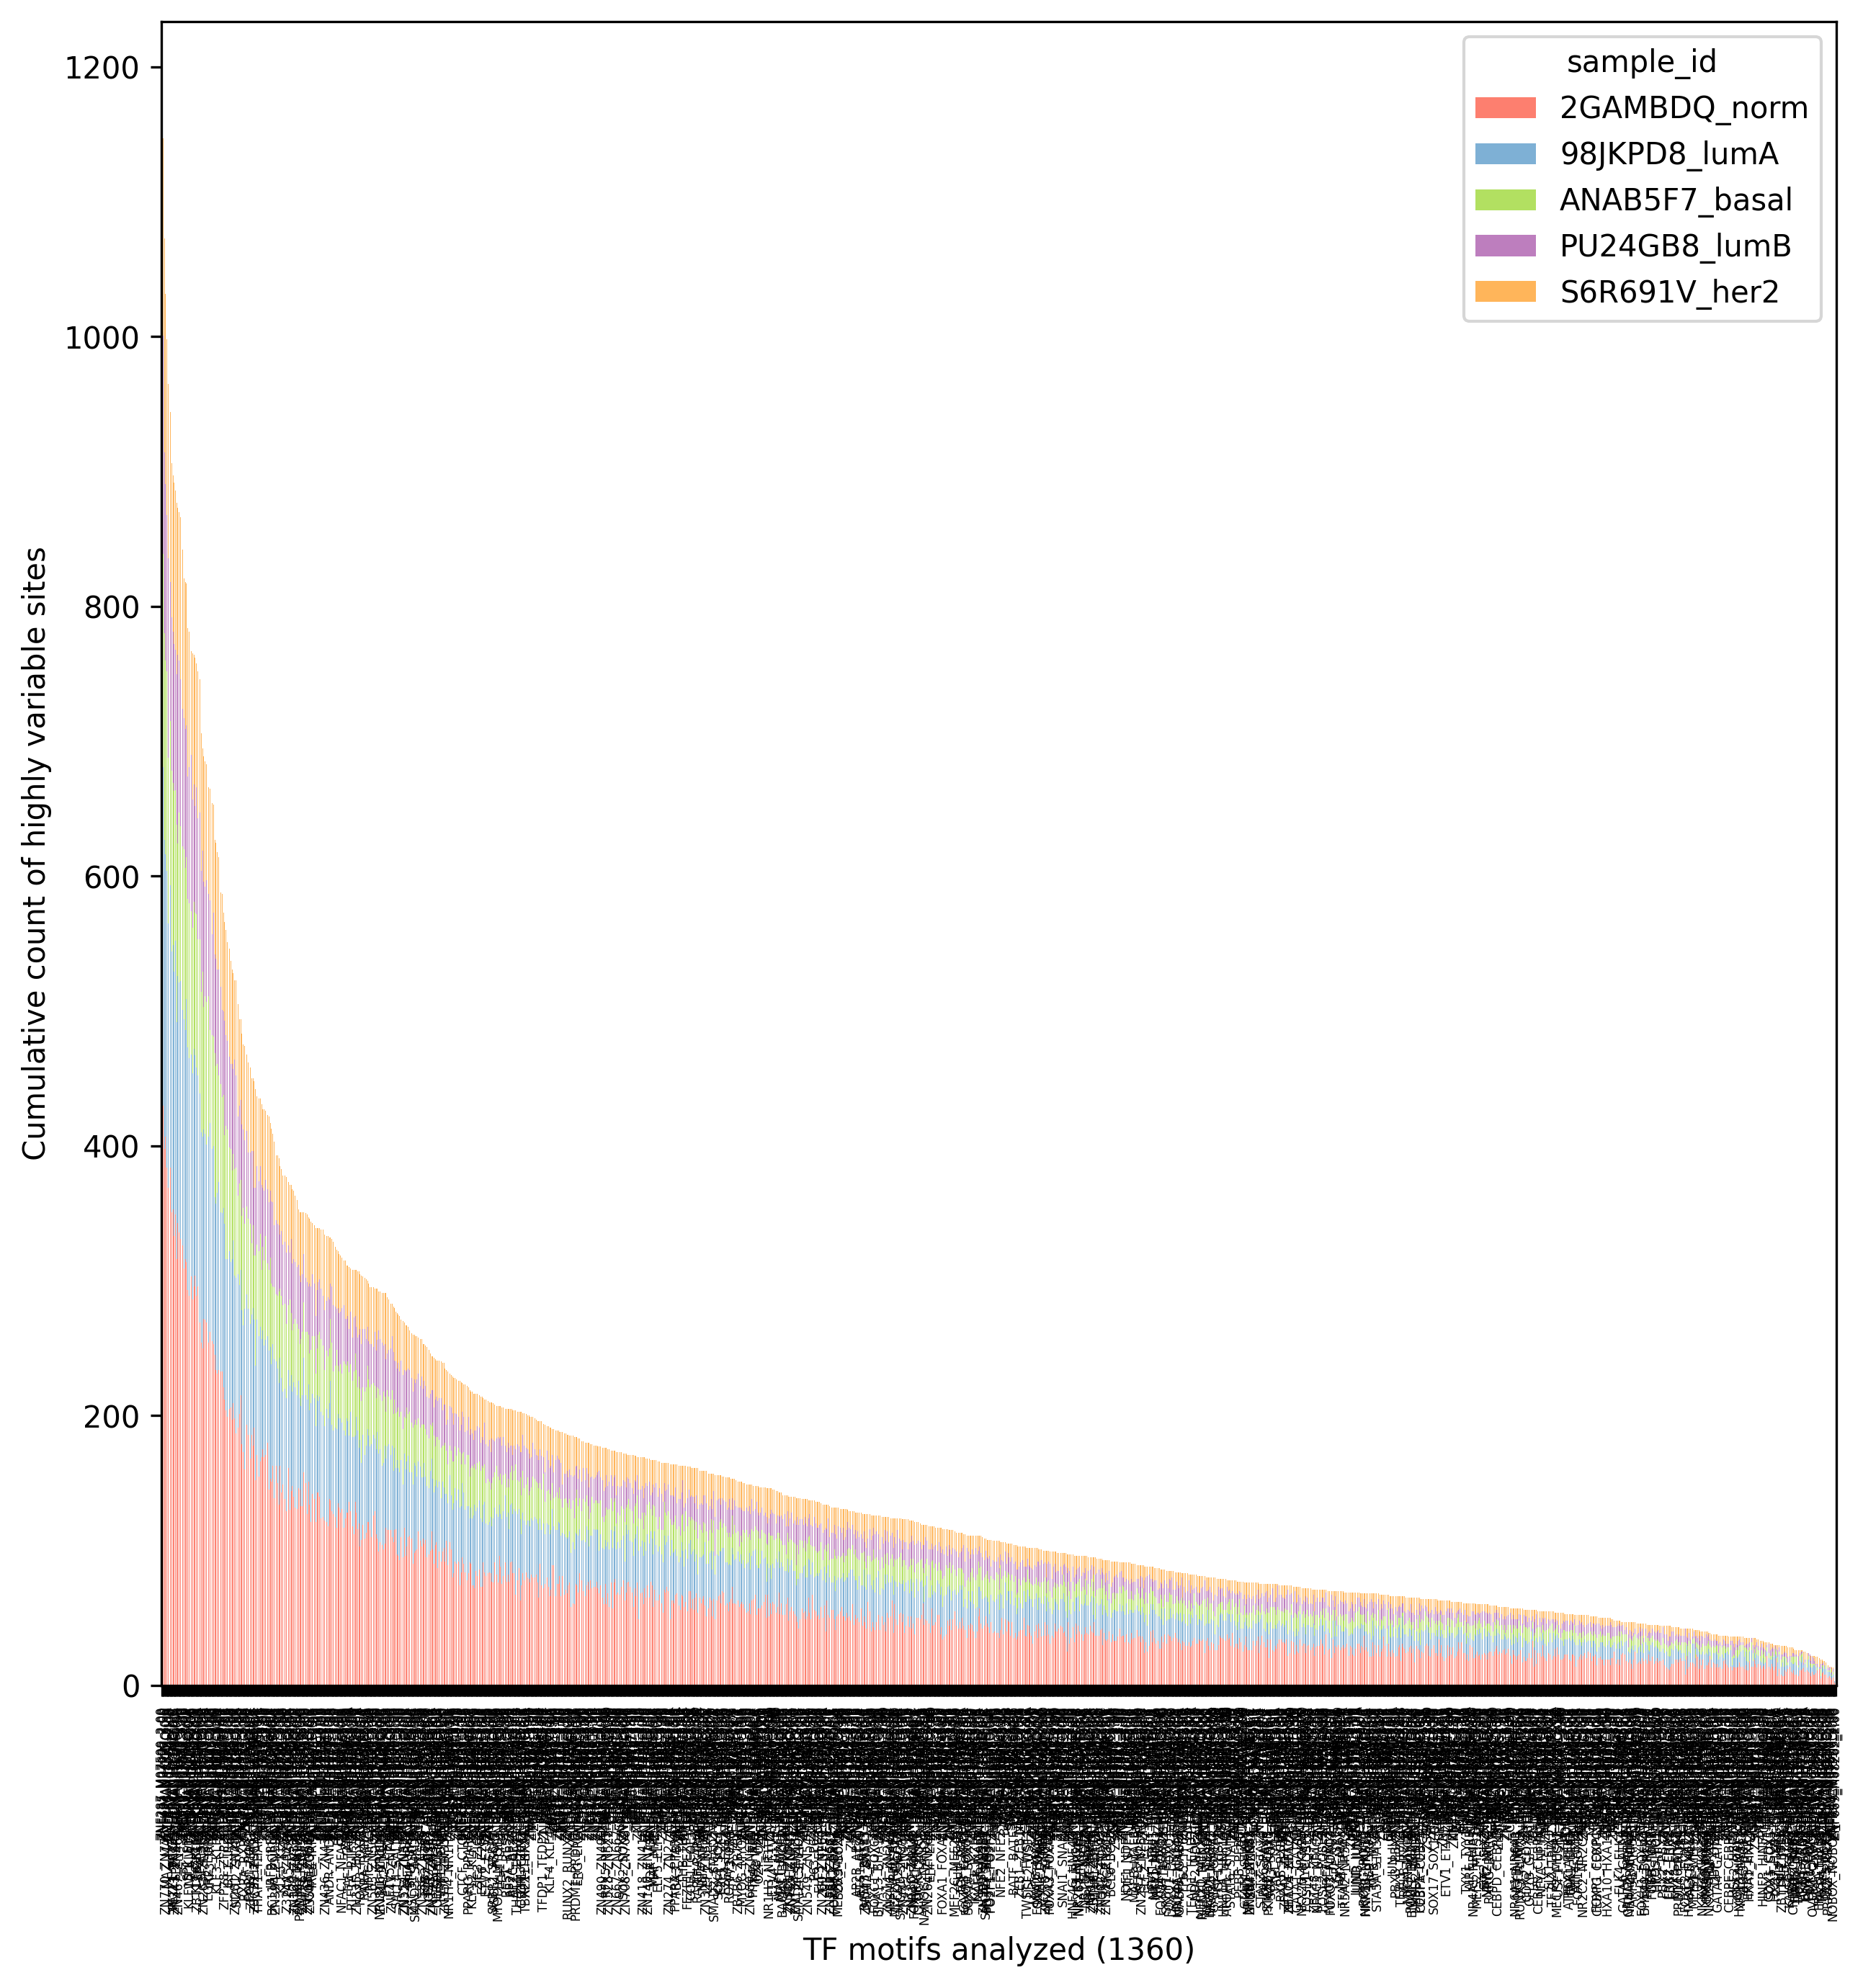

In [8]:
# Pivot the DataFrame so that each 'sample_id' is a column
pivot_df = site_counts_sorted.pivot(index='motif_id', columns='sample_id', values='max_AF_region_count').fillna(0)

# Create a new figure with high resolution
_, ax = plt.subplots(figsize=(10,10), dpi=300)

# Plot the DataFrame using the 'plot' function from pandas
pivot_df.plot(kind='bar', stacked=True, color=springpastel, ax=ax)

plt.legend(title='sample_id')
plt.xticks(rotation=90, fontsize=4)
plt.ylabel('Cumulative count of highly variable sites', fontsize=10)
plt.xlabel(f'TF motifs analyzed ({pivot_df.index.nunique()})', fontsize=10)
plt.show()

In [9]:
# truncate df to just top 5% motifs
# 1360 motifs * 0.05 = 68 motifs
site_counts_sorted_top5 = site_counts_sorted.iloc[:(68*5)].copy().reset_index(drop=True)
site_counts_sorted_top5

motif_id      sample_id  max_AF_region_count  \
0           ZNF287_M07590_2.00   2GAMBDQ_norm                  453   
1           ZNF287_M07590_2.00   98JKPD8_lumA                  265   
2           ZNF287_M07590_2.00  ANAB5F7_basal                  153   
3           ZNF287_M07590_2.00   PU24GB8_lumB                  170   
4           ZNF287_M07590_2.00   S6R691V_her2                  134   
..                         ...            ...                  ...   
335  RXRA_RXRA_HUMAN.H11MO.0.A   2GAMBDQ_norm                  160   
336  RXRA_RXRA_HUMAN.H11MO.0.A   98JKPD8_lumA                  119   
337  RXRA_RXRA_HUMAN.H11MO.0.A  ANAB5F7_basal                   63   
338  RXRA_RXRA_HUMAN.H11MO.0.A   PU24GB8_lumB                   62   
339  RXRA_RXRA_HUMAN.H11MO.0.A   S6R691V_her2                   70   

     max_FPS_region_count  
0                      61  
1                     386  
2                     500  
3                      78  
4                     150  
..                    ...  
335                    19  
336                   220  
337                   152  
338                    34  
339                    49  

[340 rows x 4 columns]

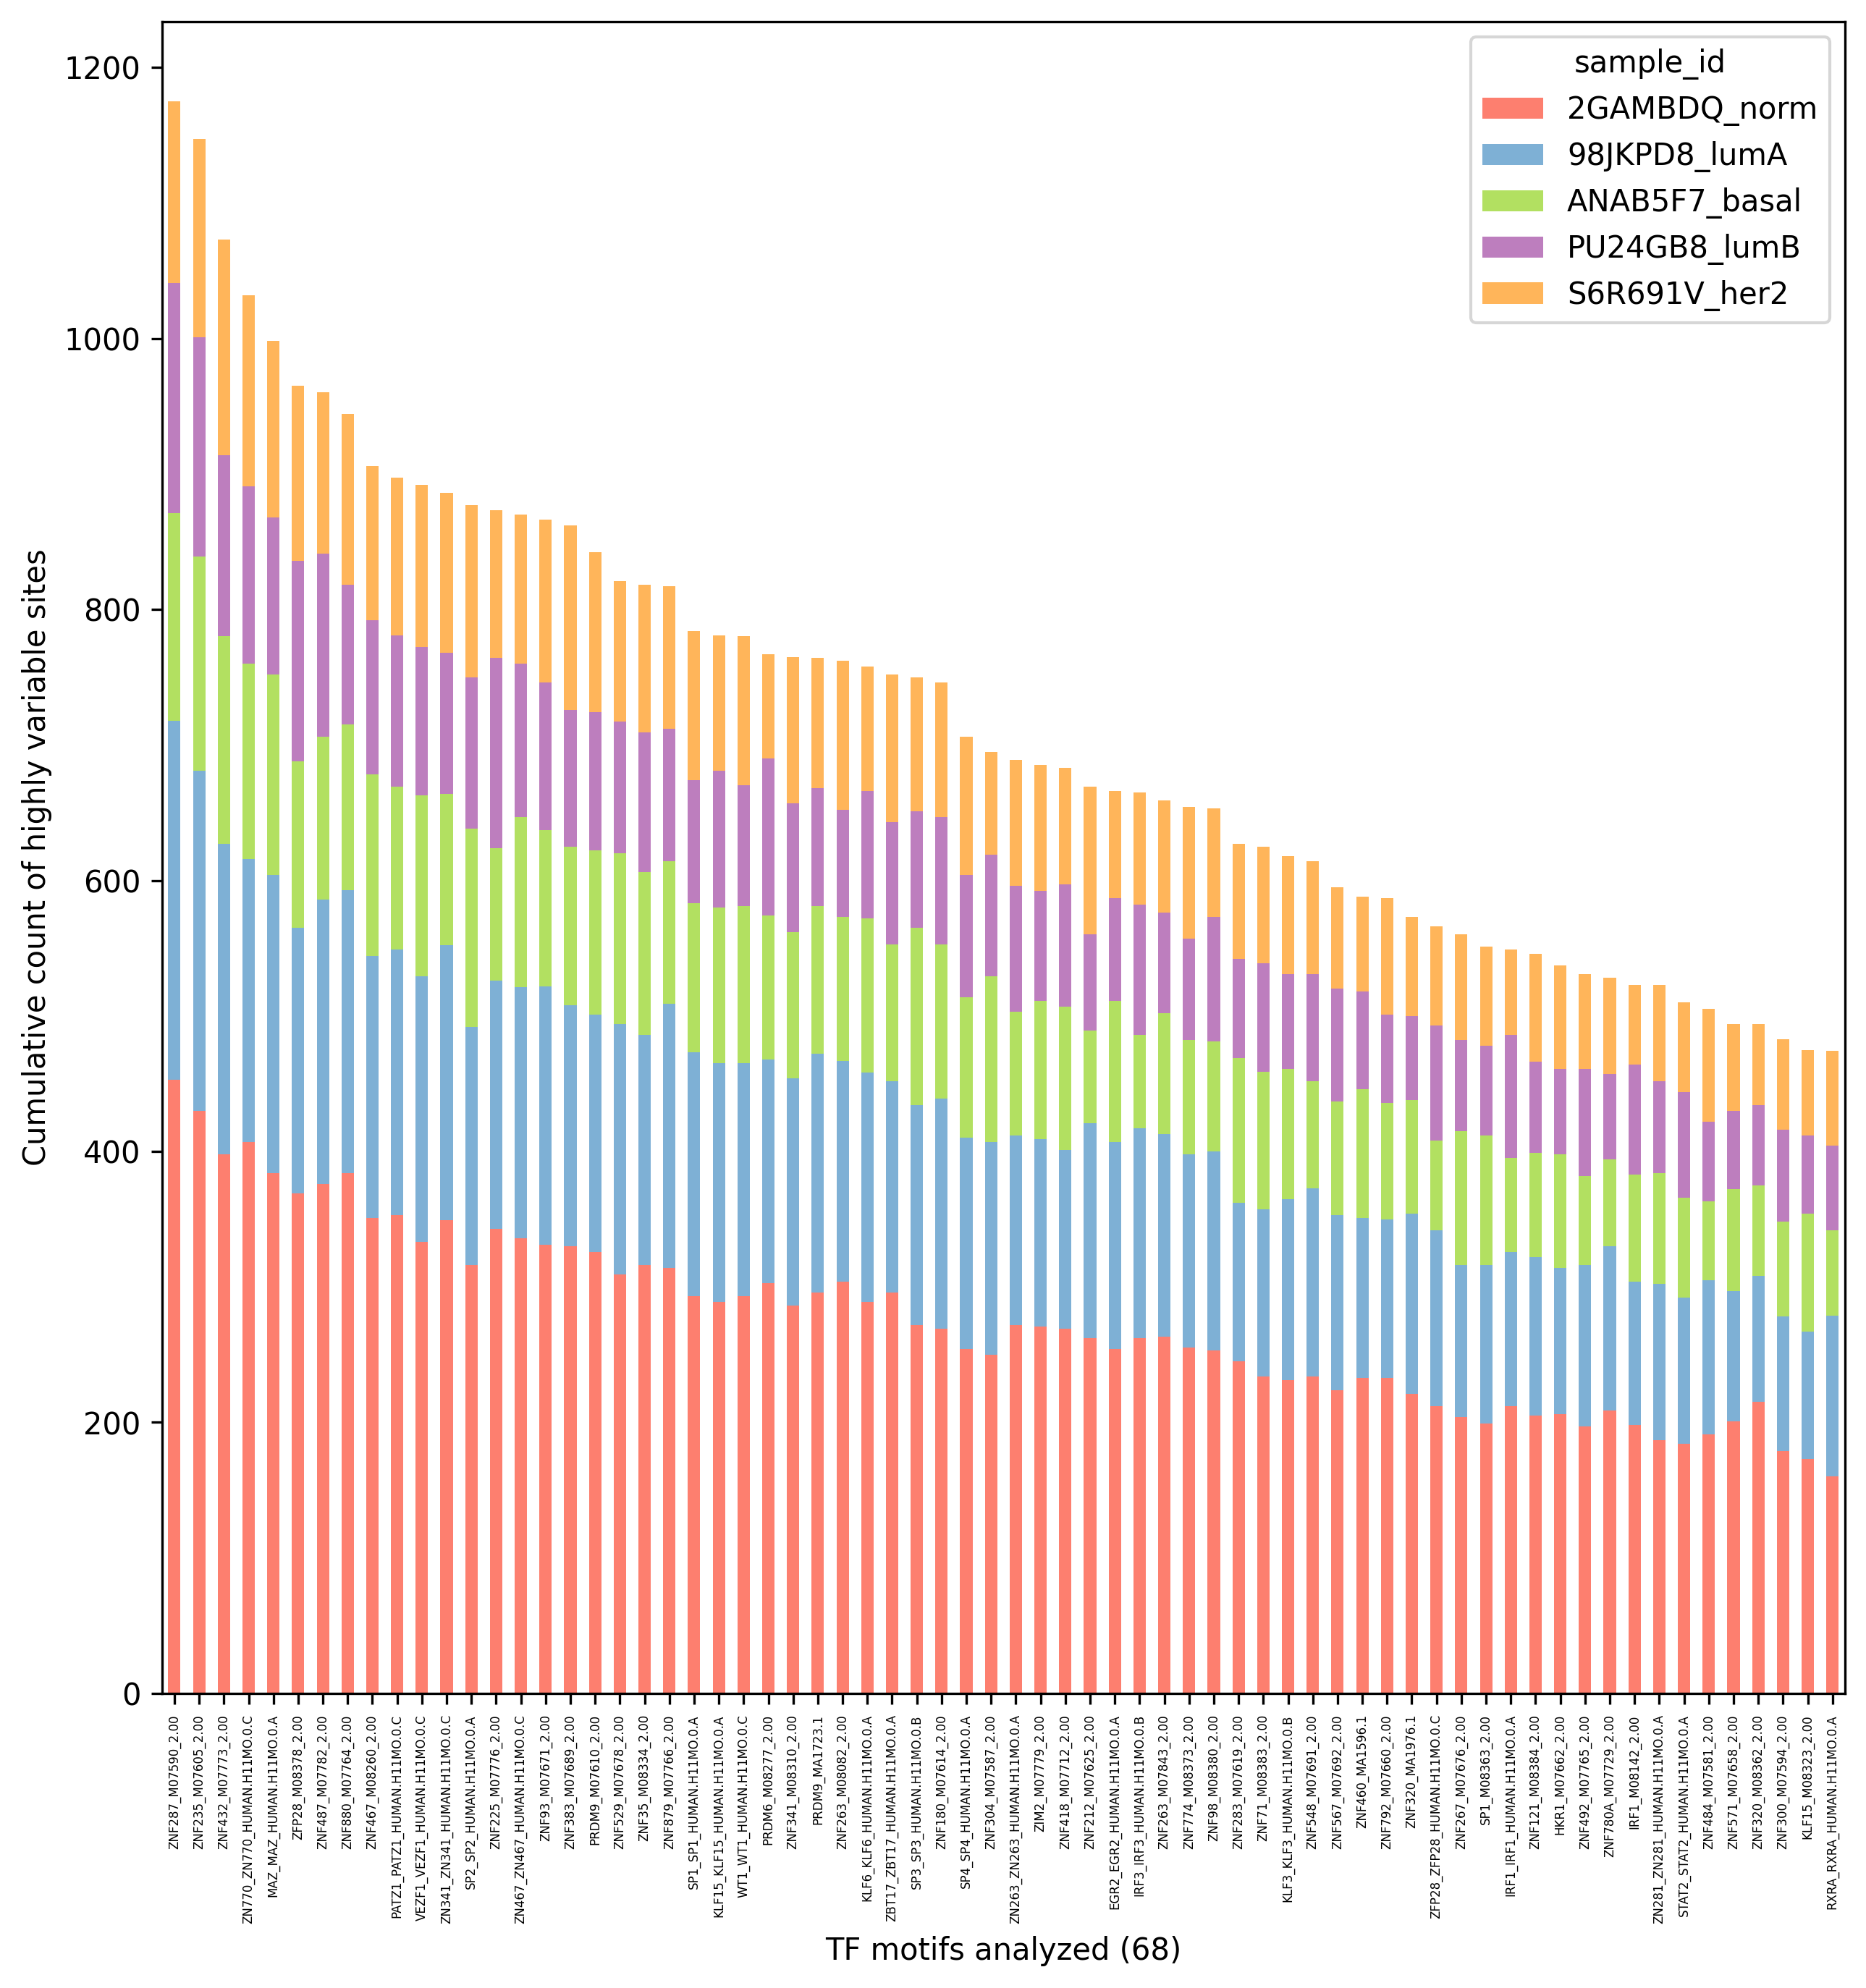

In [10]:
# Pivot the DataFrame so that each 'sample_id' is a column
pivot_df_trunc = site_counts_sorted_top5.pivot(index='motif_id', columns='sample_id', values='max_AF_region_count').fillna(0)

# Create a new figure with high resolution
_, ax = plt.subplots(figsize=(10,10), dpi=300)

# Plot the DataFrame using the 'plot' function from pandas
pivot_df_trunc.plot(kind='bar', stacked=True, color=springpastel, ax=ax)

plt.legend(title='sample_id')
plt.xticks(rotation=90, fontsize=4)
plt.ylabel('Cumulative count of highly variable sites', fontsize=10)
plt.xlabel(f'TF motifs analyzed ({pivot_df_trunc.index.nunique()})', fontsize=10)
plt.show()

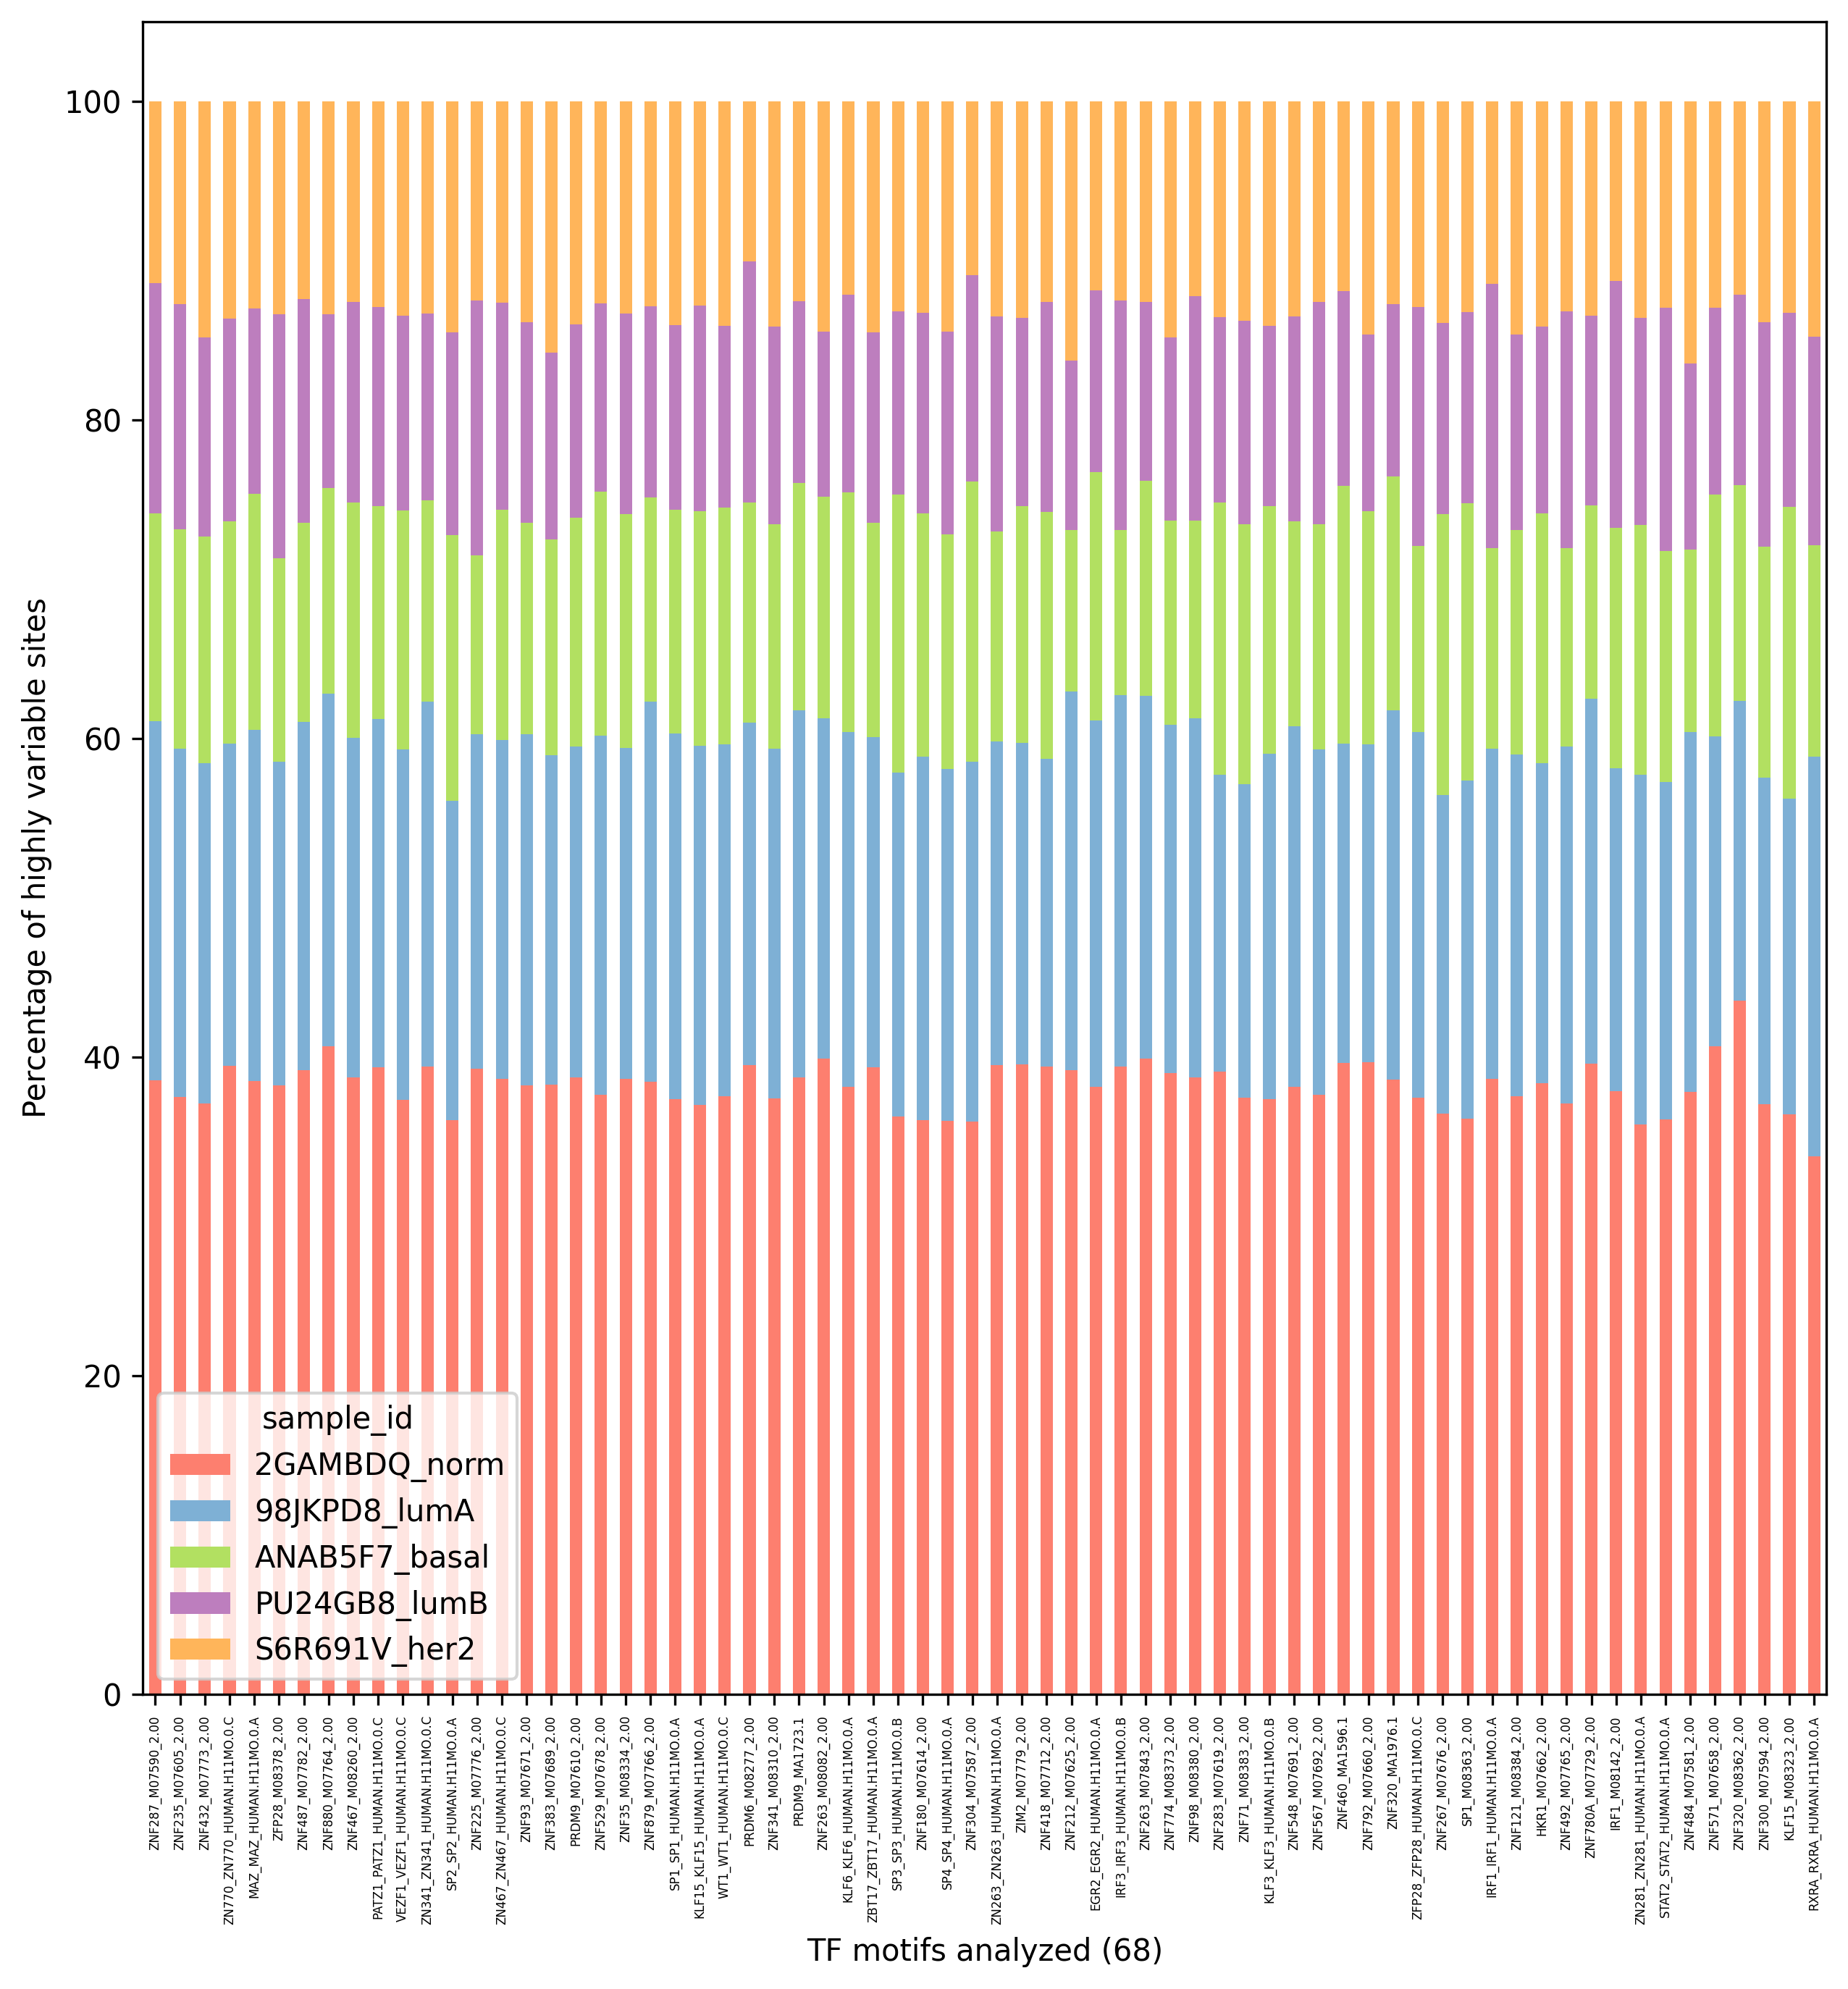

In [11]:
# Calculate the sum for each 'motif_id'
sums = pivot_df_trunc.sum(axis=1)

# Divide each 'max_AF_region_count' by the sum and multiply by 100 to get percentages
pivot_df_trunc = pivot_df_trunc.div(sums, axis=0) * 100

# Create a new figure with high resolution
_, ax = plt.subplots(figsize=(10,10), dpi=300)

# Plot the DataFrame using the 'plot' function from pandas
pivot_df_trunc.plot(kind='bar', stacked=True, color=springpastel, ax=ax)

plt.legend(title='sample_id')
plt.xticks(rotation=90, fontsize=4)
plt.ylabel('Percentage of highly variable sites', fontsize=10)
plt.xlabel(f'TF motifs analyzed ({pivot_df_trunc.index.nunique()})', fontsize=10)
plt.show()

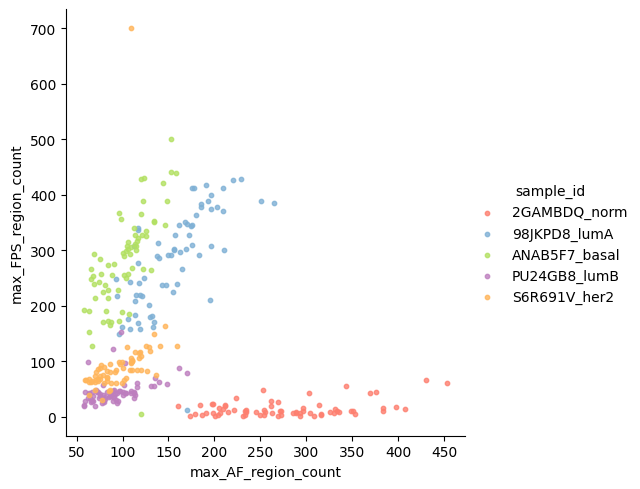

In [12]:
# plot jointplot of site_counts_sorted_top5
sns.lmplot(x='max_AF_region_count', y='max_FPS_region_count', data=site_counts_sorted_top5, hue ='sample_id', fit_reg=False, palette=springpastel, scatter_kws={'s': 10})


In [13]:
# plot the df
pivot_df

sample_id                    2GAMBDQ_norm  98JKPD8_lumA  ANAB5F7_basal  \
motif_id                                                                 
ZNF287_M07590_2.00                    453           265            153   
ZNF235_M07605_2.00                    430           251            158   
ZNF432_M07773_2.00                    398           229            153   
ZN770_ZN770_HUMAN.H11MO.0.C           407           209            144   
MAZ_MAZ_HUMAN.H11MO.0.A               384           220            148   
...                                   ...           ...            ...   
ZNF211_M07577_2.00                      6             3              3   
ZNF547_M07600_2.00                      4             3              1   
NOBOX_NOBOX_HUMAN.H11MO.0.C             6             2              2   
ZNF777_M07703_2.00                      2             1              0   
ZNF669_M08262_2.00                      0             1              1   

sample_id                    PU24GB8_lumB  S6R691V_her2  
motif_id                                                 
ZNF287_M07590_2.00                    170           134  
ZNF235_M07605_2.00                    162           146  
ZNF432_M07773_2.00                    134           159  
ZN770_ZN770_HUMAN.H11MO.0.C           131           141  
MAZ_MAZ_HUMAN.H11MO.0.A               116           130  
...                                   ...           ...  
ZNF211_M07577_2.00                      1             1  
ZNF547_M07600_2.00                      2             3  
NOBOX_NOBOX_HUMAN.H11MO.0.C             2             1  
ZNF777_M07703_2.00                      0             0  
ZNF669_M08262_2.00                      0             0  

[1360 rows x 5 columns]

In [14]:
site_counts_sorted

motif_id      sample_id  max_AF_region_count  \
5354  ZNF287_M07590_2.00   2GAMBDQ_norm                  453   
5350  ZNF287_M07590_2.00   98JKPD8_lumA                  265   
5351  ZNF287_M07590_2.00  ANAB5F7_basal                  153   
5352  ZNF287_M07590_2.00   PU24GB8_lumB                  170   
5353  ZNF287_M07590_2.00   S6R691V_her2                  134   
...                  ...            ...                  ...   
6270  ZNF669_M08262_2.00   2GAMBDQ_norm                    0   
6271  ZNF669_M08262_2.00   98JKPD8_lumA                    1   
6272  ZNF669_M08262_2.00  ANAB5F7_basal                    1   
6273  ZNF669_M08262_2.00   PU24GB8_lumB                    0   
6274  ZNF669_M08262_2.00   S6R691V_her2                    0   

      max_FPS_region_count  
5354                    61  
5350                   386  
5351                   500  
5352                    78  
5353                   150  
...                    ...  
6270                     0  
6271                     0  
6272                     2  
6273                     0  
6274                     0  

[6800 rows x 4 columns]

Let's find the common rows from the dataframe of unique regions of maximum AF subtype and the dataframe of unique regions of maximum FPS subtype. To get the whole set of data per motif id, we will need to write a script, but below is the testing done using the data for AHR motif id.


In [15]:
max_fps_regions_df = pd.read_csv('/data5/msazizan/plotting_data/plotting-v8-IQR/output_data/tables/AHR_AHR_HUMAN.H11MO.0.B/AHR_AHR_HUMAN.H11MO.0.B_max_fps-scaled_region-ids_unique.tsv', sep='\t')
max_fps_regions_df

region_id      sample_id
0     chr18:79988522-79988531  ANAB5F7_basal
1      chr3:52852394-52852403   2GAMBDQ_norm
2     chr21:39385956-39385965  ANAB5F7_basal
3    chr3:150348670-150348679  ANAB5F7_basal
4     chr12:95003775-95003784  ANAB5F7_basal
5    chr2:129178528-129178537  ANAB5F7_basal
6    chr2:215216976-215216985   S6R691V_her2
7    chr3:136819540-136819549  ANAB5F7_basal
8    chr9:104747383-104747392   98JKPD8_lumA
9      chr2:73050387-73050396  ANAB5F7_basal
10   chr2:107419007-107419016  ANAB5F7_basal
11  chr10:127346001-127346010   98JKPD8_lumA
12   chr2:227848456-227848465  ANAB5F7_basal
13   chr8:101474053-101474062   S6R691V_her2
14    chr22:39343629-39343638  ANAB5F7_basal
15   chr6:116462224-116462233  ANAB5F7_basal
16       chr7:6855218-6855227  ANAB5F7_basal
17       chr6:3259853-3259862  ANAB5F7_basal
18    chr18:59083778-59083787  ANAB5F7_basal
19   chr7:130990445-130990454   98JKPD8_lumA
20    chr17:73166460-73166469   S6R691V_her2
21  chr11:130455076-130455085   98JKPD8_lumA
22     chr6:27389139-27389148  ANAB5F7_basal
23      chr10:3399493-3399502  ANAB5F7_basal
24    chr15:78761763-78761772  ANAB5F7_basal

In [16]:
max_af_regions_df = pd.read_csv('/data5/msazizan/plotting_data/plotting-v8-IQR/output_data/tables/AHR_AHR_HUMAN.H11MO.0.B/AHR_AHR_HUMAN.H11MO.0.B_max_af_region-ids_unique.tsv', sep='\t')
max_af_regions_df

region_id      sample_id
0     chr18:79988522-79988531   98JKPD8_lumA
1      chr3:52852394-52852403   2GAMBDQ_norm
2     chr21:39385956-39385965   S6R691V_her2
3    chr3:150348670-150348679   2GAMBDQ_norm
4     chr12:95003775-95003784  ANAB5F7_basal
5    chr2:129178528-129178537   PU24GB8_lumB
6    chr2:215216976-215216985   2GAMBDQ_norm
7    chr3:136819540-136819549   S6R691V_her2
8    chr9:104747383-104747392   2GAMBDQ_norm
9      chr2:73050387-73050396   PU24GB8_lumB
10   chr2:107419007-107419016   98JKPD8_lumA
11  chr10:127346001-127346010   98JKPD8_lumA
12   chr2:227848456-227848465  ANAB5F7_basal
13   chr8:101474053-101474062   2GAMBDQ_norm
14    chr22:39343629-39343638   S6R691V_her2
15   chr6:116462224-116462233   2GAMBDQ_norm
16       chr7:6855218-6855227  ANAB5F7_basal
17       chr6:3259853-3259862   PU24GB8_lumB
18    chr18:59083778-59083787   2GAMBDQ_norm
19   chr7:130990445-130990454   2GAMBDQ_norm
20    chr17:73166460-73166469   98JKPD8_lumA
21  chr11:130455076-130455085  ANAB5F7_basal
22     chr6:27389139-27389148   PU24GB8_lumB
23      chr10:3399493-3399502   2GAMBDQ_norm
24    chr15:78761763-78761772   S6R691V_her2

In [17]:
# Assuming df1 and df2 are your two DataFrames
common_rows = max_fps_regions_df.merge(max_af_regions_df, on=['region_id', 'sample_id'], how='inner')
common_rows

region_id      sample_id
0     chr3:52852394-52852403   2GAMBDQ_norm
1    chr12:95003775-95003784  ANAB5F7_basal
2  chr10:127346001-127346010   98JKPD8_lumA
3   chr2:227848456-227848465  ANAB5F7_basal
4       chr7:6855218-6855227  ANAB5F7_basal

Now that the bulk script `AF_FPS_common-max-region-extraction.py` has been run, we can load the concatenated data.

In [18]:
# load concatenated table
concat_df = pd.read_csv('/data5/msazizan/plotting_data/IQR-region-counts/All-motifs_common_max_AF-FPS_regions.tsv', sep='\t')
concat_df

motif_id                  region_id      sample_id
0      ZNF8_ZNF8_HUMAN.H11MO.0.C    chr12:80877312-80877334   2GAMBDQ_norm
1      ZNF8_ZNF8_HUMAN.H11MO.0.C    chr16:87966899-87966921   98JKPD8_lumA
2      ZNF8_ZNF8_HUMAN.H11MO.0.C   chr8:127801832-127801854   98JKPD8_lumA
3      ZNF8_ZNF8_HUMAN.H11MO.0.C   chr8:100465713-100465735   S6R691V_her2
4      ZNF8_ZNF8_HUMAN.H11MO.0.C     chr3:43624736-43624758  ANAB5F7_basal
...                          ...                        ...            ...
34108             CTCFL_MA1102.2    chr18:48357207-48357219   98JKPD8_lumA
34109             CTCFL_MA1102.2  chr10:123559521-123559533  ANAB5F7_basal
34110             CTCFL_MA1102.2     chr1:84772522-84772534   98JKPD8_lumA
34111             CTCFL_MA1102.2     chr8:22757860-22757872   2GAMBDQ_norm
34112             CTCFL_MA1102.2   chr1:246506829-246506841  ANAB5F7_basal

[34113 rows x 3 columns]

In [19]:
# count the number of regions when grouped by motif_id 
region_sum_sorted = concat_df.groupby('motif_id')['region_id'].nunique().sort_values(ascending=False).to_frame()
region_sum_sorted

region_id
motif_id                              
ZNF235_M07605_2.00                 211
ZNF287_M07590_2.00                 202
ZNF432_M07773_2.00                 178
ZN770_ZN770_HUMAN.H11MO.0.C        166
ZNF487_M07782_2.00                 163
...                                ...
MEF2A_M08212_2.00                    1
DUX4_M08135_2.00                     1
CUX1_CUX1_HUMAN.H11MO.0.C            1
DBP_DBP_HUMAN.H11MO.0.B              1
DUX4_MA0468.1                        1

[1358 rows x 1 columns]

In [20]:
# it seems like there are 2 motifs that have 0 common regions between max_AF and max_FPS
# let's plot the region_id on a barplot

# set categorical order for motif_id to sort by region_sum_sorted
concat_df['motif_id'] = pd.Categorical(concat_df['motif_id'], categories=region_sum_sorted.index, ordered=True)
concat_df = concat_df.sort_values(['motif_id'])
concat_df


motif_id                  region_id      sample_id
12285         ZNF235_M07605_2.00    chr12:14922458-14922488   2GAMBDQ_norm
12403         ZNF235_M07605_2.00   chr1:156484578-156484608   98JKPD8_lumA
12404         ZNF235_M07605_2.00  chr12:112932593-112932623   98JKPD8_lumA
12405         ZNF235_M07605_2.00   chr6:155202028-155202058   2GAMBDQ_norm
12406         ZNF235_M07605_2.00       chr3:4741532-4741562   98JKPD8_lumA
...                          ...                        ...            ...
25247          MEF2A_M08212_2.00   chr4:154945241-154945251  ANAB5F7_basal
29213           DUX4_M08135_2.00    chr13:26770672-26770683   S6R691V_her2
29206  CUX1_CUX1_HUMAN.H11MO.0.C   chr6:158081545-158081559   98JKPD8_lumA
29207    DBP_DBP_HUMAN.H11MO.0.B   chr4:165086116-165086127  ANAB5F7_basal
29214              DUX4_MA0468.1    chr13:26770672-26770683   S6R691V_her2

[34113 rows x 3 columns]

In [21]:
# count the number of regions per motif_id for each value in sample_id
region_count_df = concat_df.groupby(['motif_id', 'sample_id'], observed=False)['region_id'].nunique().to_frame()
# rename the column region_id to region_count
region_count_df = region_count_df.rename(columns={'region_id': 'region_count'})
region_count_df

region_count
motif_id           sample_id                  
ZNF235_M07605_2.00 2GAMBDQ_norm             30
                   98JKPD8_lumA             95
                   ANAB5F7_basal            52
                   PU24GB8_lumB             15
                   S6R691V_her2             19
...                                        ...
DUX4_MA0468.1      2GAMBDQ_norm              0
                   98JKPD8_lumA              0
                   ANAB5F7_basal             0
                   PU24GB8_lumB              0
                   S6R691V_her2              1

[6790 rows x 1 columns]

In [22]:
# reset index and then pivot the table
pivot_df = region_count_df.reset_index().pivot(index='motif_id', columns='sample_id', values='region_count').fillna(0)
pivot_df

sample_id                    2GAMBDQ_norm  98JKPD8_lumA  ANAB5F7_basal  \
motif_id                                                                 
ZNF235_M07605_2.00                     30            95             52   
ZNF287_M07590_2.00                     28            88             61   
ZNF432_M07773_2.00                      7            86             56   
ZN770_ZN770_HUMAN.H11MO.0.C             7            74             54   
ZNF487_M07782_2.00                     19            64             50   
...                                   ...           ...            ...   
MEF2A_M08212_2.00                       0             0              1   
DUX4_M08135_2.00                        0             0              0   
CUX1_CUX1_HUMAN.H11MO.0.C               0             1              0   
DBP_DBP_HUMAN.H11MO.0.B                 0             0              1   
DUX4_MA0468.1                           0             0              0   

sample_id                    PU24GB8_lumB  S6R691V_her2  
motif_id                                                 
ZNF235_M07605_2.00                     15            19  
ZNF287_M07590_2.00                     11            14  
ZNF432_M07773_2.00                      6            23  
ZN770_ZN770_HUMAN.H11MO.0.C            12            19  
ZNF487_M07782_2.00                     14            16  
...                                   ...           ...  
MEF2A_M08212_2.00                       0             0  
DUX4_M08135_2.00                        0             1  
CUX1_CUX1_HUMAN.H11MO.0.C               0             0  
DBP_DBP_HUMAN.H11MO.0.B                 0             0  
DUX4_MA0468.1                           0             1  

[1358 rows x 5 columns]

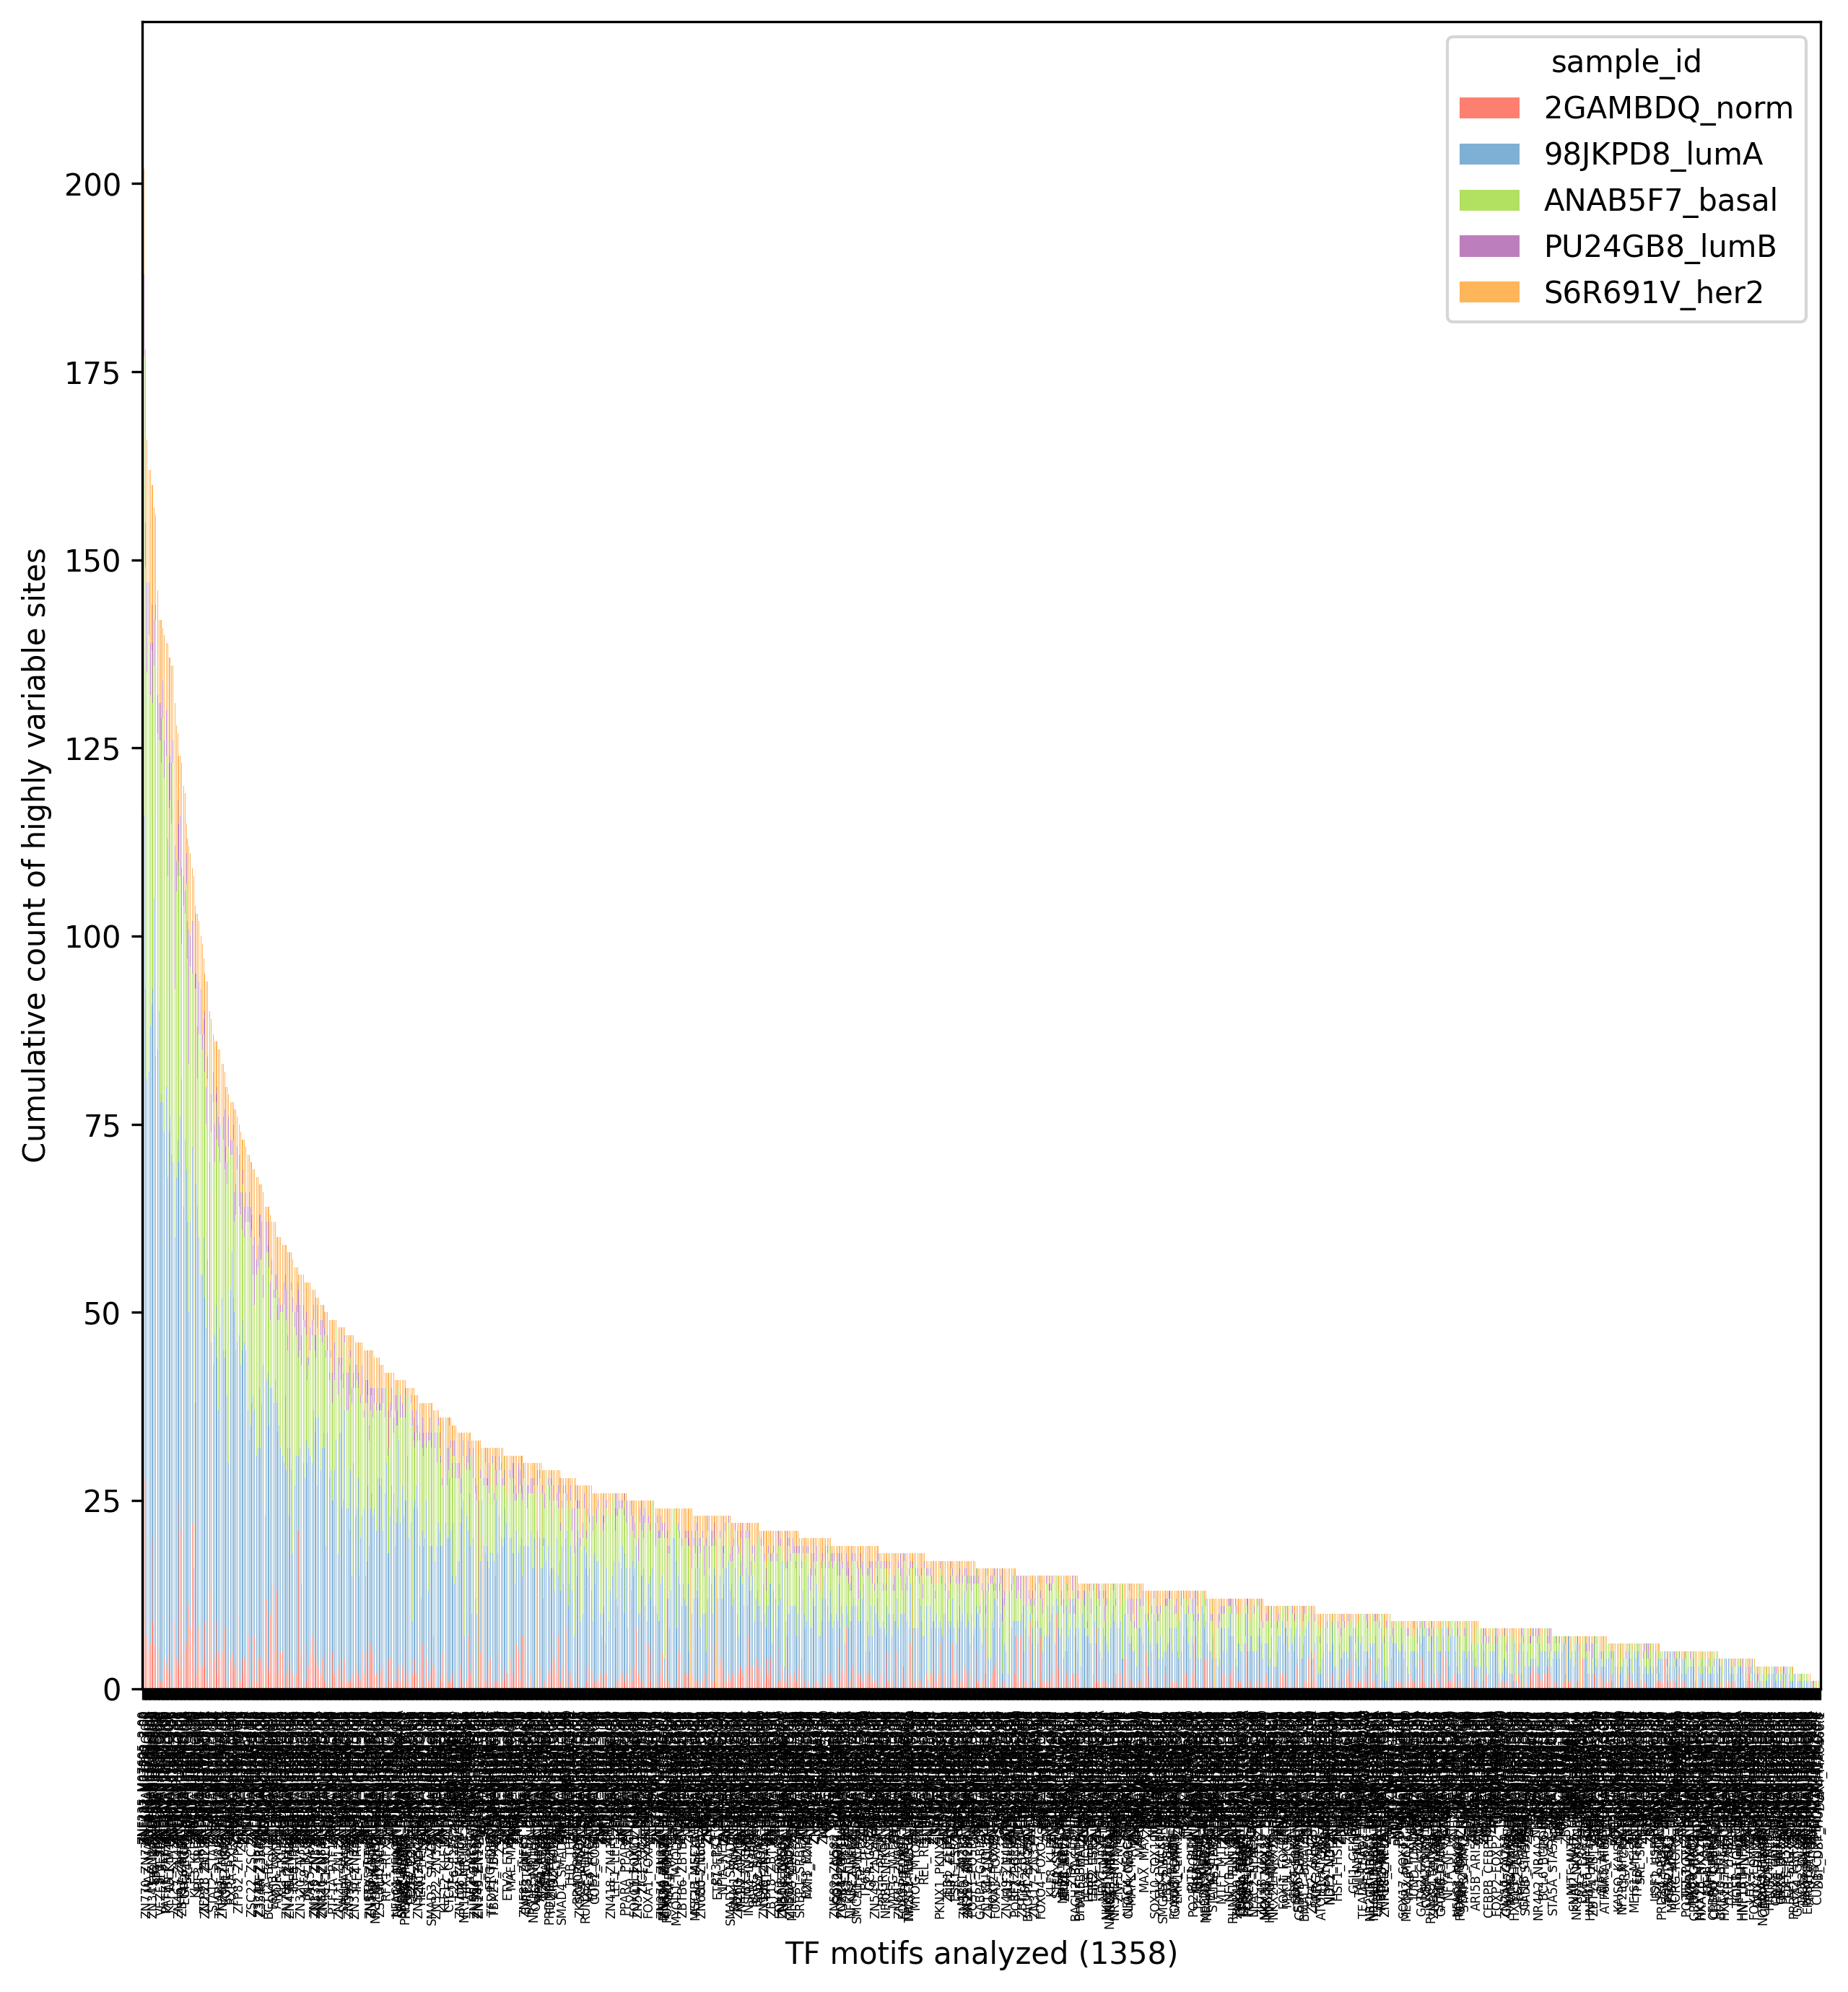

In [23]:
# plot stacked barplot
# Create a new figure with high resolution
_, ax = plt.subplots(figsize=(10,10), dpi=300)

# Plot the DataFrame using the 'plot' function from pandas
pivot_df.plot(kind='bar', stacked=True, color=springpastel, ax=ax)

plt.legend(title='sample_id')
plt.xticks(rotation=90, fontsize=4)
plt.ylabel('Cumulative count of highly variable sites', fontsize=10)
plt.xlabel(f'TF motifs analyzed ({pivot_df.index.nunique()})', fontsize=10)
plt.show()

In [24]:
pivot_df_resindx = pivot_df.reset_index()
pivot_df_resindx[pivot_df_resindx['motif_id'] == 'AHR_AHR_HUMAN.H11MO.0.B']

sample_id                 motif_id  2GAMBDQ_norm  98JKPD8_lumA  ANAB5F7_basal  \
1269       AHR_AHR_HUMAN.H11MO.0.B             1             1              3   

sample_id  PU24GB8_lumB  S6R691V_her2  
1269                  0             0

In [25]:
# truncate df to just top 20% motifs
# 1360 motifs * 0.2 = 272 motifs
pivot_df_top10 = pivot_df.iloc[:(136)].copy()
pivot_df_top10

sample_id                    2GAMBDQ_norm  98JKPD8_lumA  ANAB5F7_basal  \
motif_id                                                                 
ZNF235_M07605_2.00                     30            95             52   
ZNF287_M07590_2.00                     28            88             61   
ZNF432_M07773_2.00                      7            86             56   
ZN770_ZN770_HUMAN.H11MO.0.C             7            74             54   
ZNF487_M07782_2.00                     19            64             50   
...                                   ...           ...            ...   
KLF9_KLF9_HUMAN.H11MO.0.C               0            28             20   
ZNF17_M07681_2.00                       1            32             14   
ZNF398_M07716_2.00                      6            24             11   
ZNF554_M08341_2.00                      3            29             11   
PAX5_PAX5_HUMAN.H11MO.0.A               5            26             14   

sample_id                    PU24GB8_lumB  S6R691V_her2  
motif_id                                                 
ZNF235_M07605_2.00                     15            19  
ZNF287_M07590_2.00                     11            14  
ZNF432_M07773_2.00                      6            23  
ZN770_ZN770_HUMAN.H11MO.0.C            12            19  
ZNF487_M07782_2.00                     14            16  
...                                   ...           ...  
KLF9_KLF9_HUMAN.H11MO.0.C               1             5  
ZNF17_M07681_2.00                       3             4  
ZNF398_M07716_2.00                      3            10  
ZNF554_M08341_2.00                      1            10  
PAX5_PAX5_HUMAN.H11MO.0.A               3             6  

[136 rows x 5 columns]

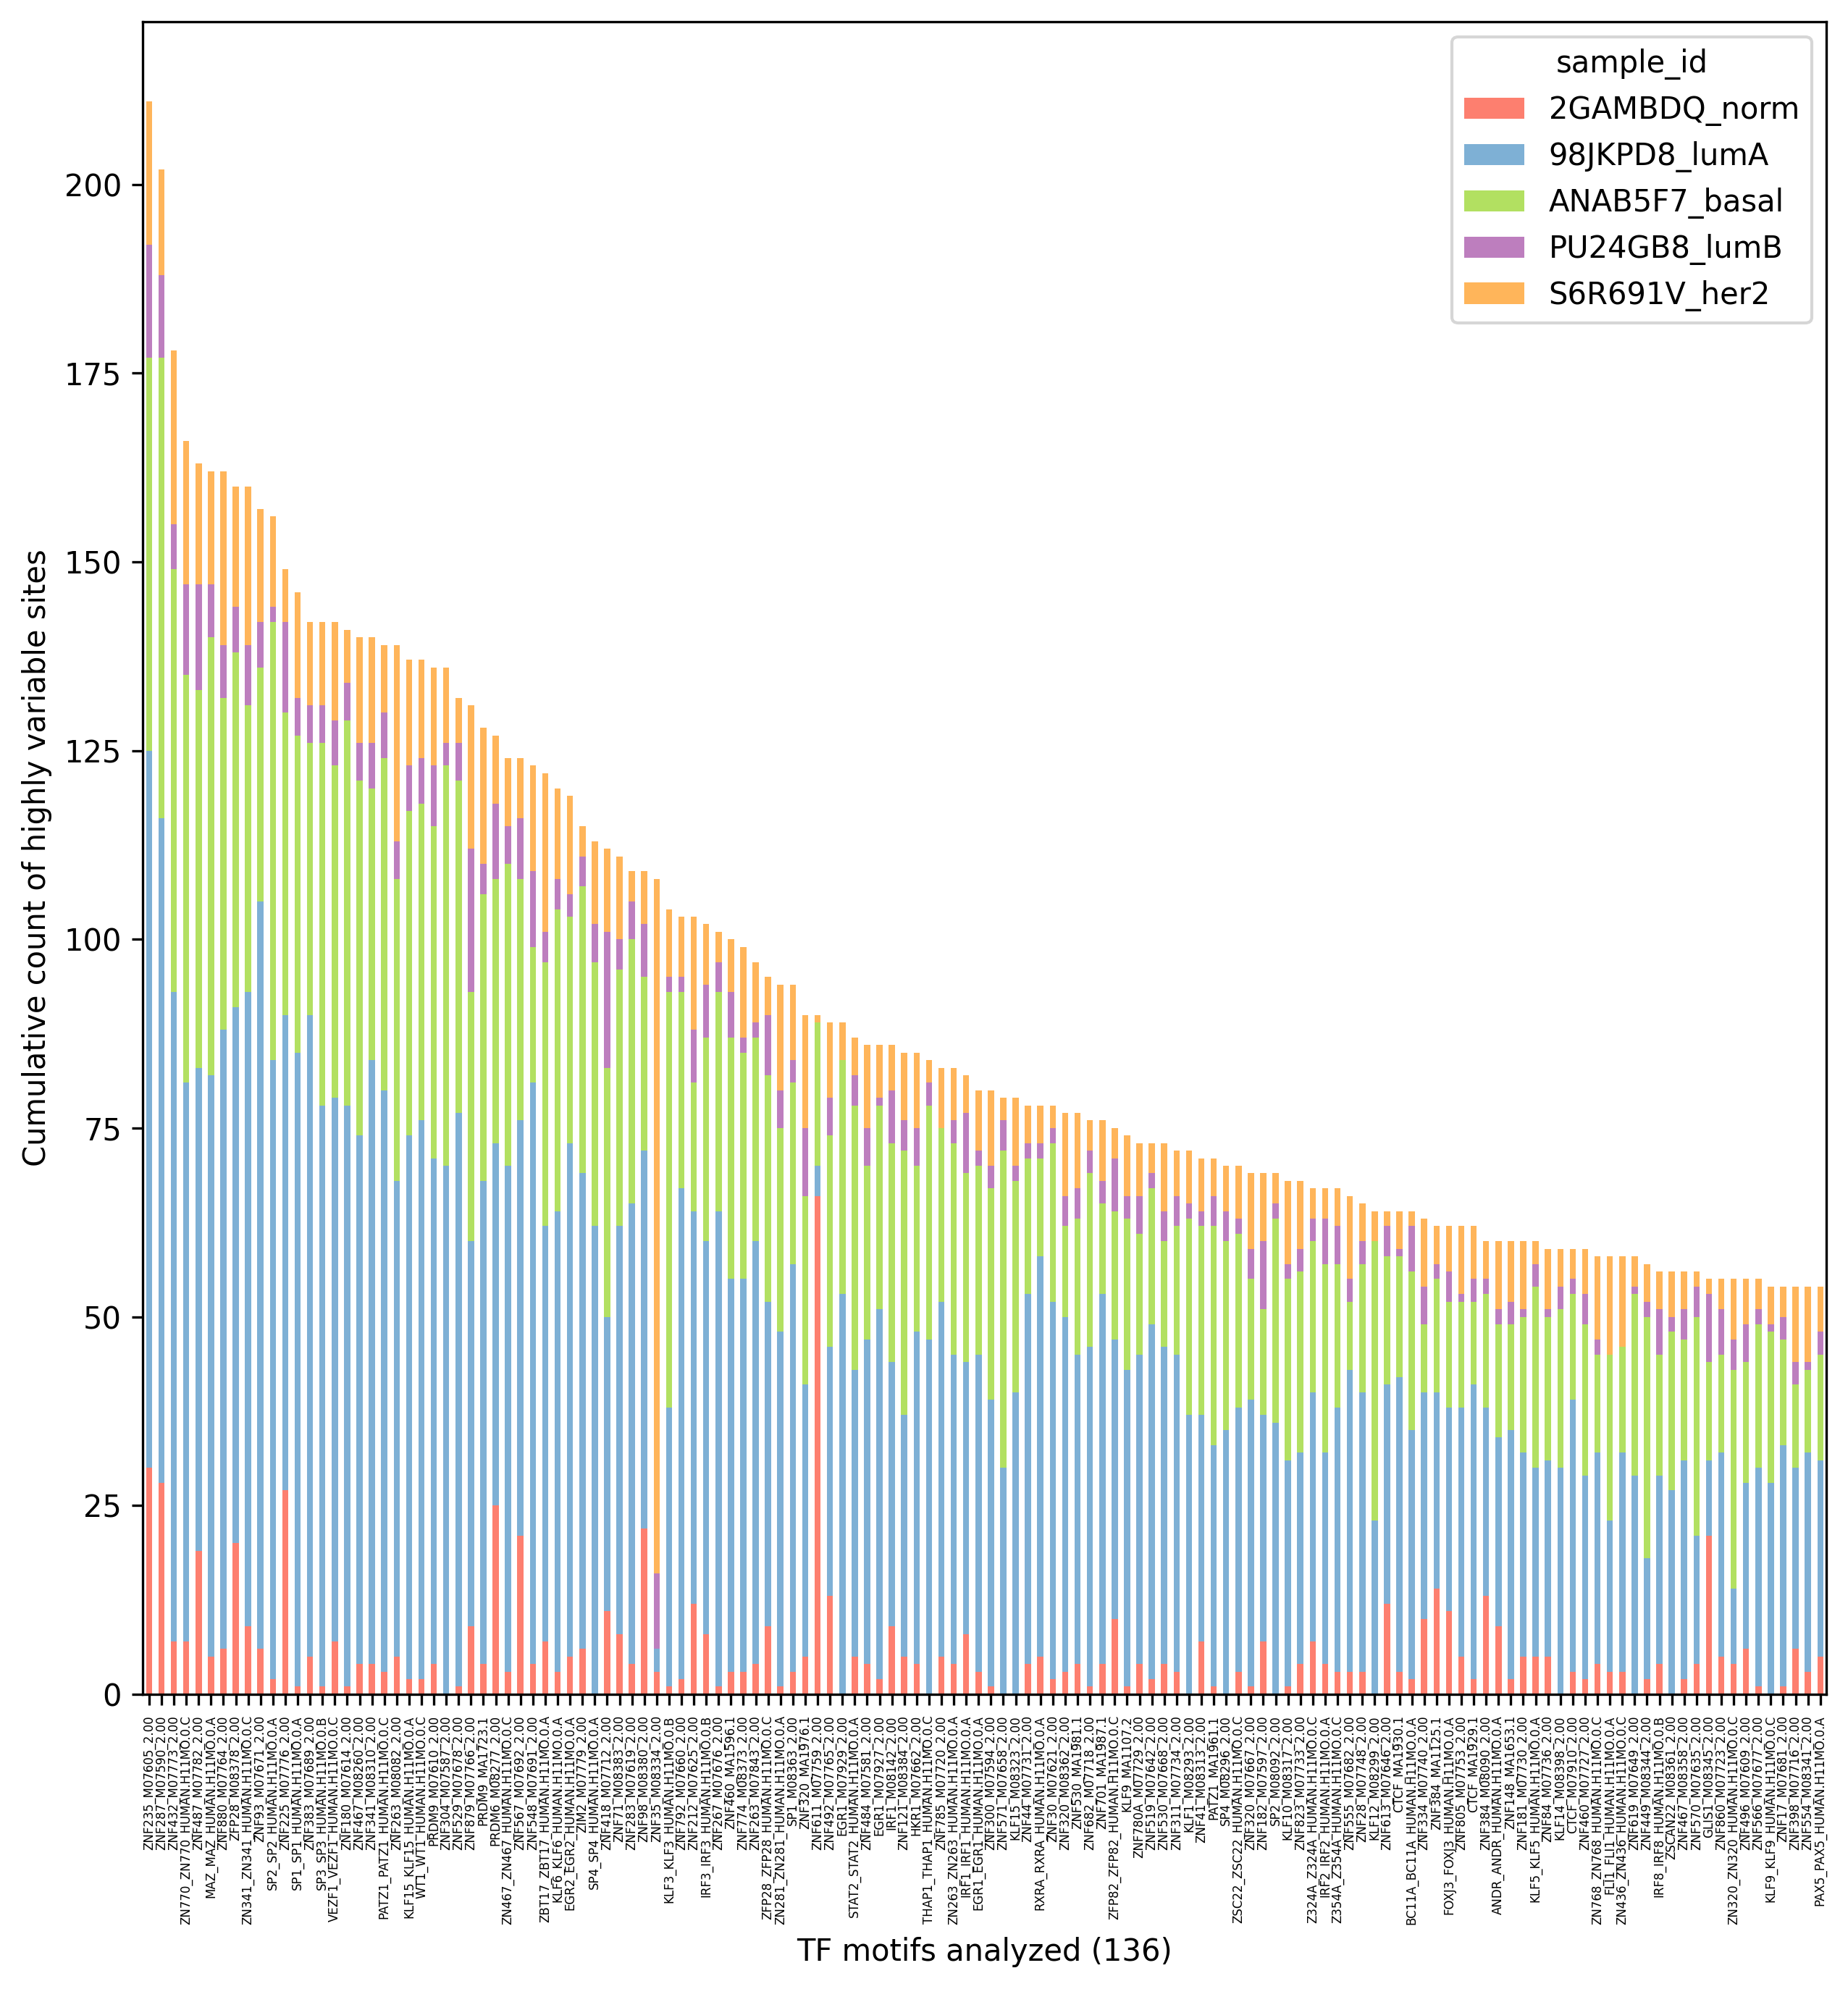

In [26]:
# Create a new figure with high resolution
_, ax = plt.subplots(figsize=(10,10), dpi=300)

# Plot the DataFrame using the 'plot' function from pandas
pivot_df_top10.plot(kind='bar', stacked=True, color=springpastel, ax=ax)

plt.legend(title='sample_id')
plt.xticks(rotation=90, fontsize=4)
plt.ylabel('Cumulative count of highly variable sites', fontsize=10)
plt.xlabel(f'TF motifs analyzed ({pivot_df_top10.index.nunique()})', fontsize=10)
plt.show()

In [27]:
# truncate df to just second 10% motifs

pivot_df_2nddecile = pivot_df.iloc[136:272].copy()
pivot_df_2nddecile

sample_id                    2GAMBDQ_norm  98JKPD8_lumA  ANAB5F7_basal  \
motif_id                                                                 
ZBTB26_M08340_2.00                      0            31             14   
ZNF677_M08382_2.00                      7            23             17   
ZNF816_M07657_2.00                      4            33             12   
ZNF76_ZNF76_HUMAN.H11MO.0.C             4            30             11   
ZN335_ZN335_HUMAN.H11MO.0.A             4            32              8   
...                                   ...           ...            ...   
STAT1STAT2_MA0517.1                     4            16              8   
KLF4_KLF4_HUMAN.H11MO.0.A               1            17             10   
ZN554_ZN554_HUMAN.H11MO.0.C             0            12             14   
ZNF132_M07588_2.00                      0            10             15   
ZN586_ZN586_HUMAN.H11MO.0.C             0             0              0   

sample_id                    PU24GB8_lumB  S6R691V_her2  
motif_id                                                 
ZBTB26_M08340_2.00                      3             5  
ZNF677_M08382_2.00                      2             4  
ZNF816_M07657_2.00                      2             2  
ZNF76_ZNF76_HUMAN.H11MO.0.C             2             6  
ZN335_ZN335_HUMAN.H11MO.0.A             3             5  
...                                   ...           ...  
STAT1STAT2_MA0517.1                     4             1  
KLF4_KLF4_HUMAN.H11MO.0.A               1             4  
ZN554_ZN554_HUMAN.H11MO.0.C             2             5  
ZNF132_M07588_2.00                      2             6  
ZN586_ZN586_HUMAN.H11MO.0.C             0            33  

[136 rows x 5 columns]

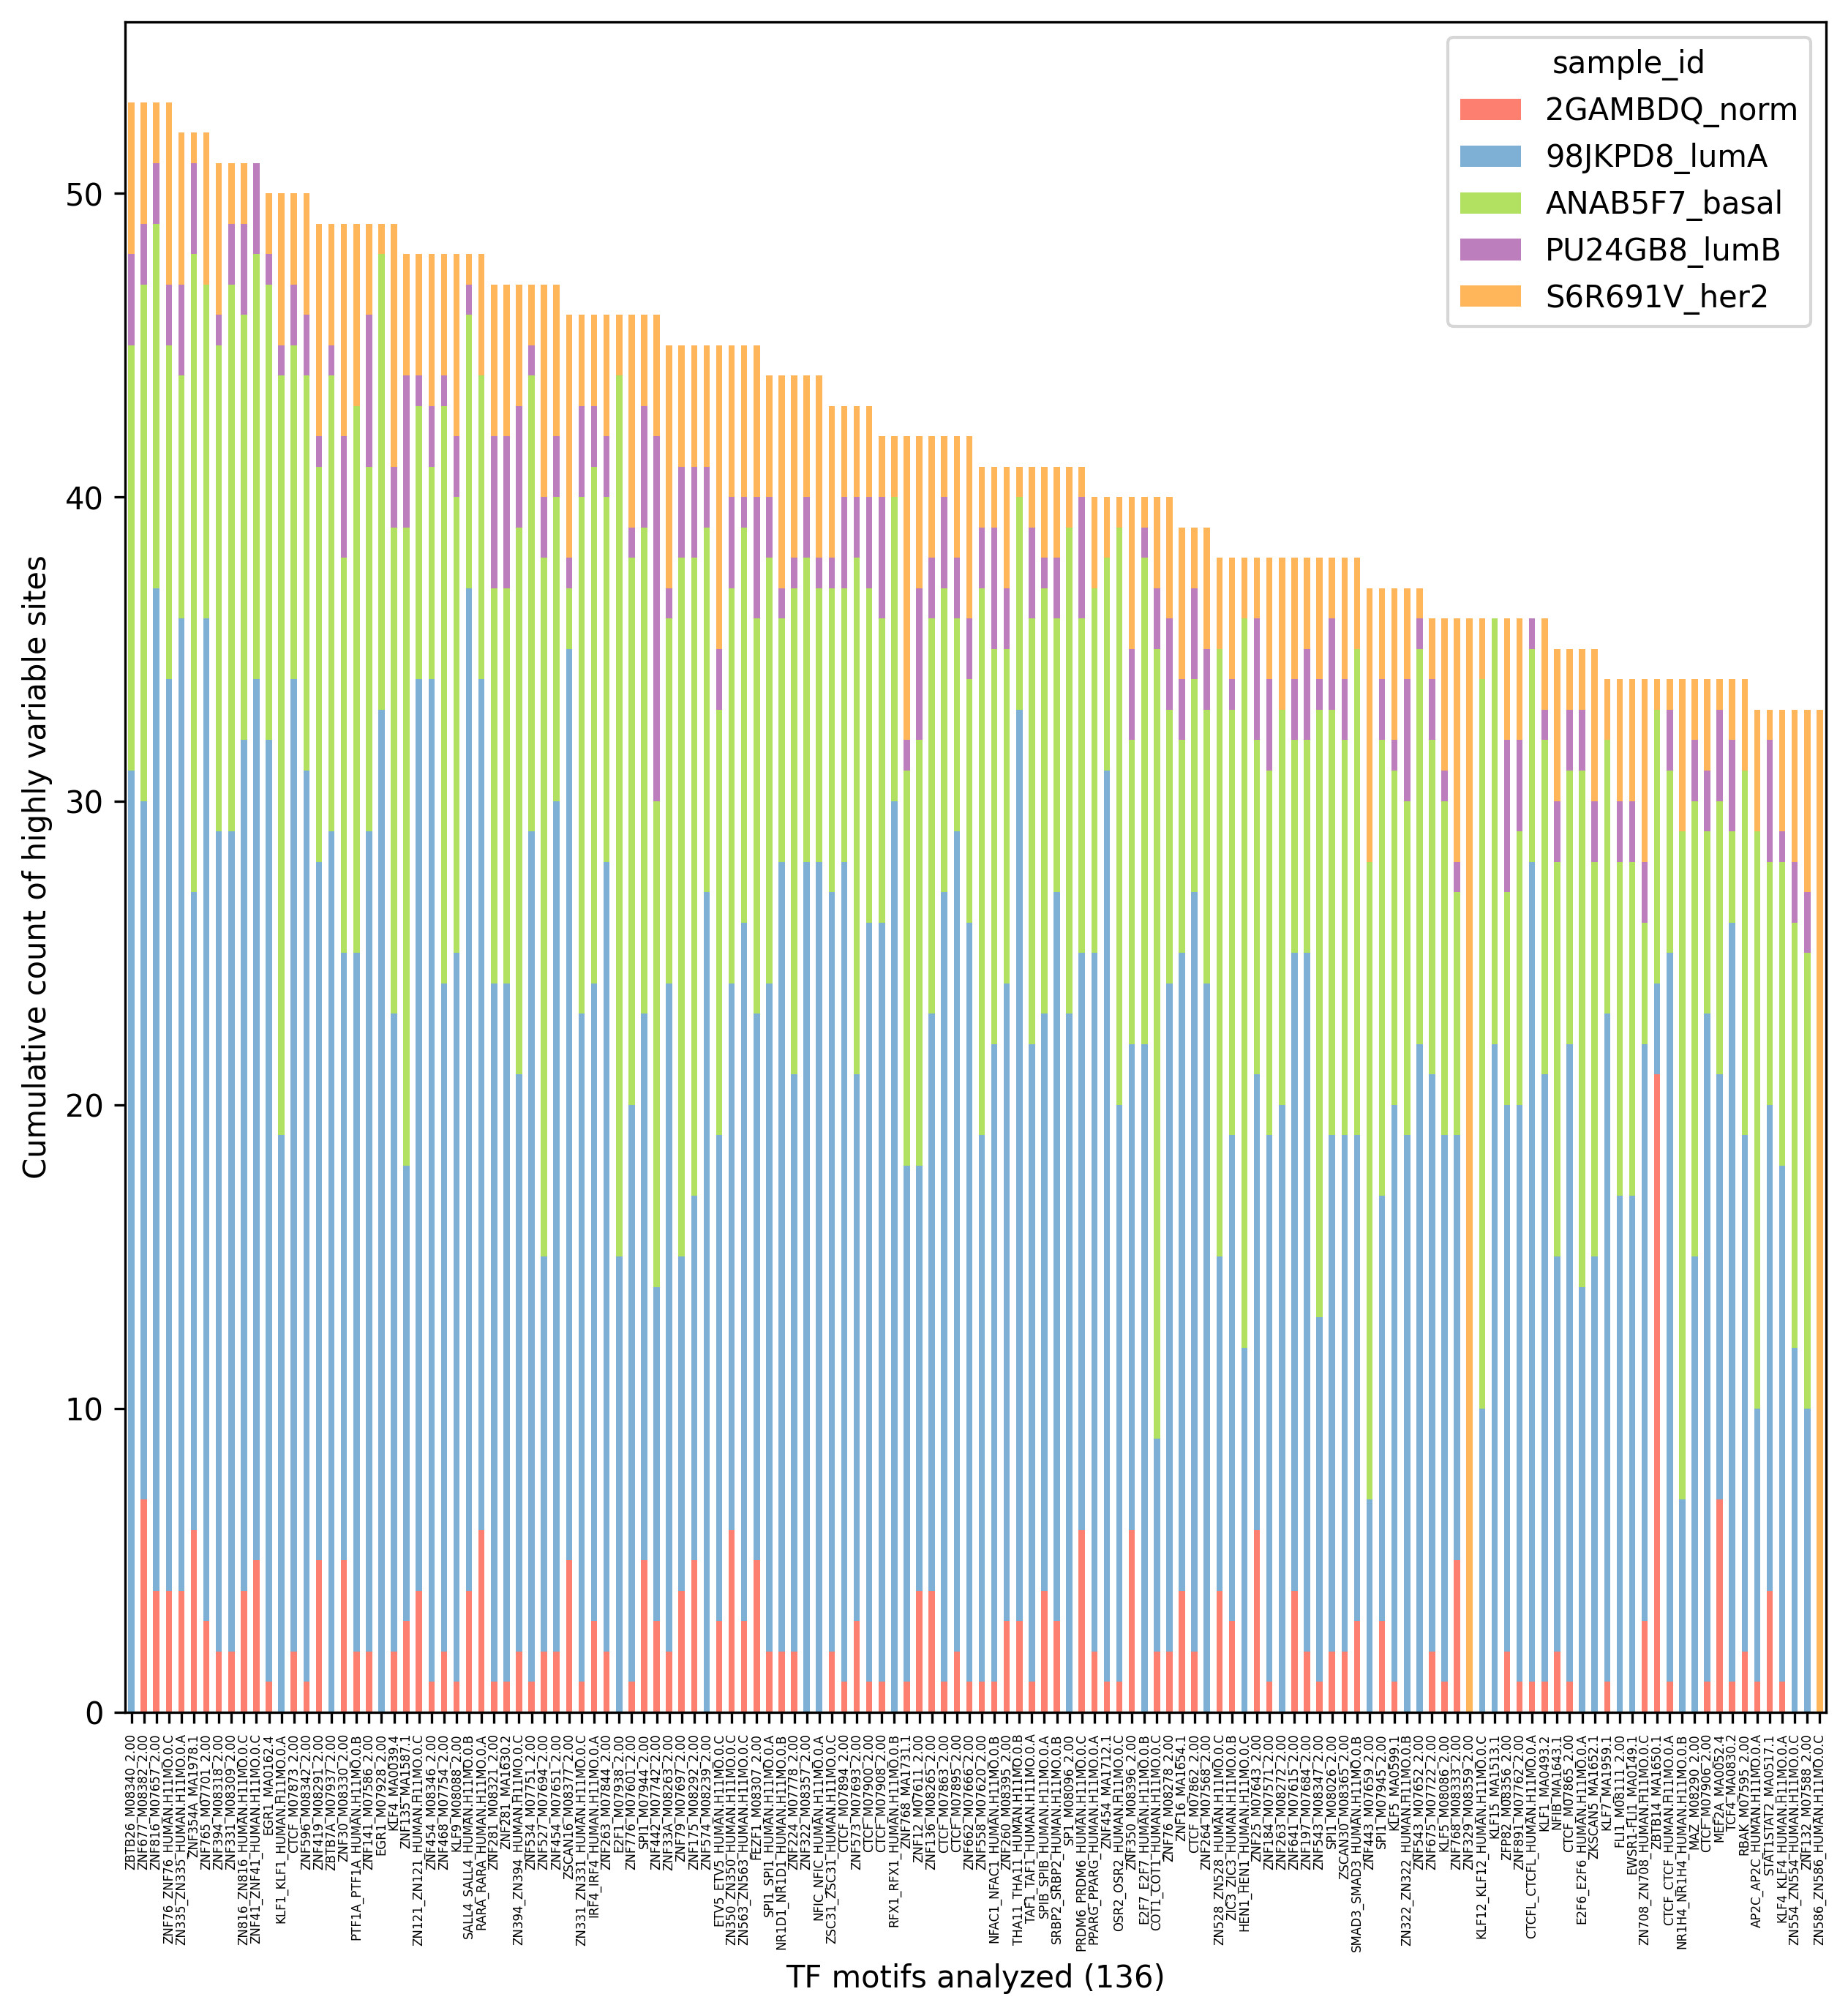

In [28]:
# Create a new figure with high resolution
_, ax = plt.subplots(figsize=(10,10), dpi=300)

# Plot the DataFrame using the 'plot' function from pandas
pivot_df_2nddecile.plot(kind='bar', stacked=True, color=springpastel, ax=ax)

plt.legend(title='sample_id')
plt.xticks(rotation=90, fontsize=4)
plt.ylabel('Cumulative count of highly variable sites', fontsize=10)
plt.xlabel(f'TF motifs analyzed ({pivot_df_2nddecile.index.nunique()})', fontsize=10)
plt.show()

In [29]:
# now load the HI AF HI FPS regions
hiaf_hifps_df = pd.read_csv('/data5/msazizan/plotting_data/plotting-v8-mean/output_data/tables/AHR_AHR_HUMAN.H11MO.0.B/AHR_AHR_HUMAN.H11MO.0.B_HI_AF_regs_GT_FPS-mean_sorted_by_FPS_var_table.tsv', sep='\t')
hiaf_hifps_df

region_id      sample_id        AF      FPS  FPS_scaled  \
0   chr18:79988522-79988531   2GAMBDQ_norm  0.875000  0.49969    0.092715   
1   chr18:79988522-79988531   98JKPD8_lumA  0.916667  0.62179    0.174289   
2   chr18:79988522-79988531  ANAB5F7_basal  0.764706  0.59997    0.183840   
3   chr18:79988522-79988531   PU24GB8_lumB  0.868421  0.61650    0.144774   
4   chr18:79988522-79988531   S6R691V_her2  0.882353  0.38262    0.105304   
..                      ...            ...       ...      ...         ...   
70     chr1:2652355-2652364   2GAMBDQ_norm  0.562500  0.11039    0.020482   
71     chr1:2652355-2652364   98JKPD8_lumA  0.666667  0.08868    0.024857   
72     chr1:2652355-2652364  ANAB5F7_basal  0.647059  0.06024    0.018458   
73     chr1:2652355-2652364   PU24GB8_lumB  0.631579  0.08740    0.020524   
74     chr1:2652355-2652364   S6R691V_her2  0.647059  0.09709    0.026721   

     FPS_var  FPS_scaled_var    AF_var  
0   0.010612        0.001640  0.003269  
1   0.010612        0.001640  0.003269  
2   0.010612        0.001640  0.003269  
3   0.010612        0.001640  0.003269  
4   0.010612        0.001640  0.003269  
..       ...             ...       ...  
70  0.000338        0.000012  0.001620  
71  0.000338        0.000012  0.001620  
72  0.000338        0.000012  0.001620  
73  0.000338        0.000012  0.001620  
74  0.000338        0.000012  0.001620  

[75 rows x 8 columns]

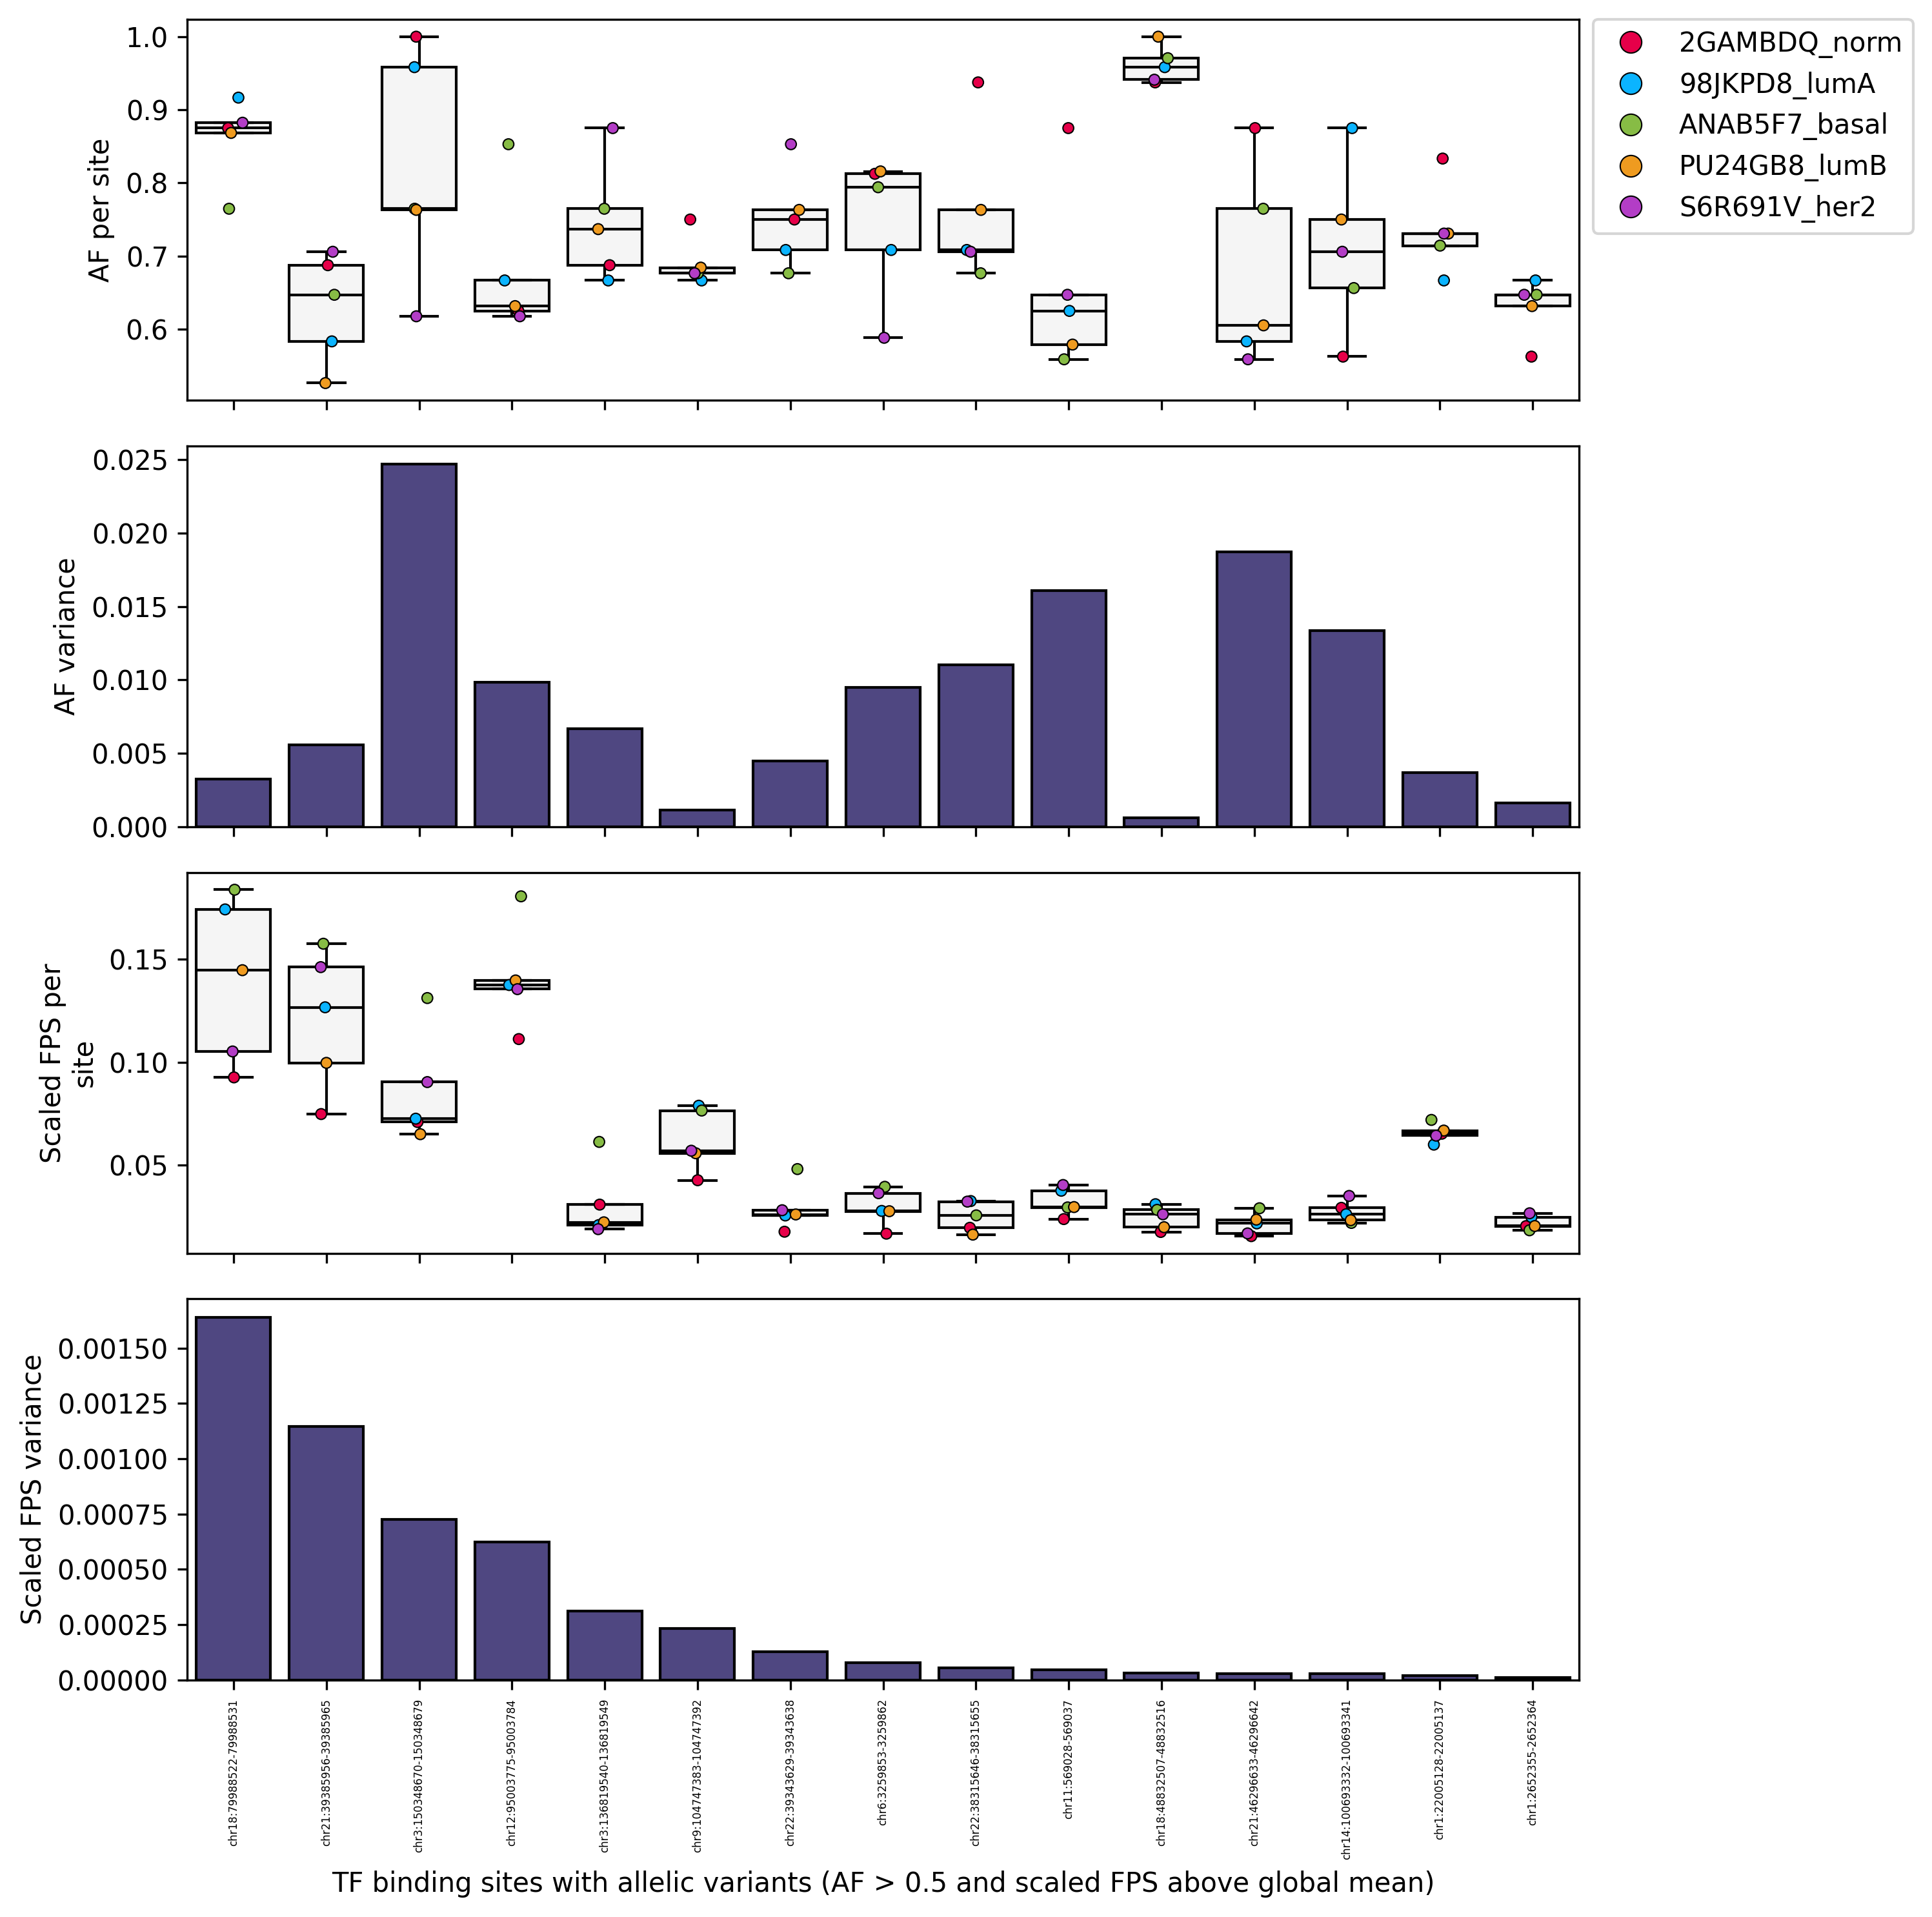

In [30]:
import textwrap
plt.figure(figsize=(10, 10), dpi=300)
# specify subplot
plt.subplot(4, 1, 1)
sns.boxplot(x='region_id', y='AF', data=hiaf_hifps_df, color='whitesmoke', linecolor='black', showfliers=False)
sns.stripplot(x='region_id', y='AF', data=hiaf_hifps_df, hue='sample_id', palette=dutchfield, size=4, jitter=True, linewidth=0.5, edgecolor='black')
plt.xticks(ticks=plt.xticks()[0], labels=[])
plt.xlabel('')
ylabel = textwrap.fill('AF per site', width=15)
plt.ylabel(ylabel, fontsize=10)
# place legend outside of the plot
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0, markerscale=2, fontsize=10)

plt.subplot(4, 1, 2)
sns.barplot(x='region_id', y='AF_var', data=hiaf_hifps_df, color='darkslateblue', edgecolor='black')
plt.xticks(ticks=plt.xticks()[0], labels=[])
plt.xlabel('')
ylabel = textwrap.fill('AF variance', width=15)
plt.ylabel(ylabel, fontsize=10)

plt.subplot(4, 1, 3)
sns.boxplot(x='region_id', y='FPS_scaled', data=hiaf_hifps_df, color='whitesmoke', linecolor='black', showfliers=False)
sns.stripplot(x='region_id', y='FPS_scaled', data=hiaf_hifps_df, hue='sample_id', palette=dutchfield, size=4, jitter=True, legend=False, linewidth=0.5, edgecolor='black')
plt.xticks(ticks=plt.xticks()[0], labels=[])
plt.xlabel('')
ylabel = textwrap.fill('Scaled FPS per site', width=15)
plt.ylabel(ylabel, fontsize=10)

plt.subplot(4, 1, 4)
sns.barplot(x='region_id', y='FPS_scaled_var', data=hiaf_hifps_df, color='darkslateblue', edgecolor='black')
plt.xticks(rotation=90, fontsize=4)
plt.xlabel(f'TF binding sites with allelic variants (AF > 0.5 and scaled FPS above global mean)', fontsize=10)
plt.ylabel('Scaled FPS variance', fontsize=10)
plt.subplots_adjust(hspace=0.05) 
plt.tight_layout()
plt.show()

In [31]:
# now load the HI AF LO FPS regions

hiaf_lofps_df = pd.read_csv('/data5/msazizan/plotting_data/plotting-v8-mean/output_data/tables/AHR_AHR_HUMAN.H11MO.0.B/AHR_AHR_HUMAN.H11MO.0.B_HI_AF_regs_LT_FPS-mean_sorted_by_FPS_var_table.tsv', sep='\t')
hiaf_lofps_df

region_id      sample_id        AF      FPS  FPS_scaled  \
0     chr13:95414915-95414924   2GAMBDQ_norm  0.700000  0.01583    0.002937   
1     chr13:95414915-95414924   98JKPD8_lumA  0.650000  0.00986    0.002764   
2     chr13:95414915-95414924  ANAB5F7_basal  0.676471  0.04009    0.012284   
3     chr13:95414915-95414924   PU24GB8_lumB  0.909091  0.00661    0.001552   
4     chr13:95414915-95414924   S6R691V_her2  0.633333  0.00917    0.002524   
..                        ...            ...       ...      ...         ...   
535  chr2:191399132-191399141   2GAMBDQ_norm  1.000000  0.01555    0.002885   
536  chr2:191399132-191399141   98JKPD8_lumA  1.000000  0.01240    0.003476   
537  chr2:191399132-191399141  ANAB5F7_basal  0.961538  0.01056    0.003236   
538  chr2:191399132-191399141   PU24GB8_lumB  1.000000  0.01432    0.003363   
539  chr2:191399132-191399141   S6R691V_her2  1.000000  0.01130    0.003110   

      FPS_var  FPS_scaled_var    AF_var  
0    0.000188    1.965176e-05  0.012567  
1    0.000188    1.965176e-05  0.012567  
2    0.000188    1.965176e-05  0.012567  
3    0.000188    1.965176e-05  0.012567  
4    0.000188    1.965176e-05  0.012567  
..        ...             ...       ...  
535  0.000004    5.250910e-08  0.000296  
536  0.000004    5.250910e-08  0.000296  
537  0.000004    5.250910e-08  0.000296  
538  0.000004    5.250910e-08  0.000296  
539  0.000004    5.250910e-08  0.000296  

[540 rows x 8 columns]

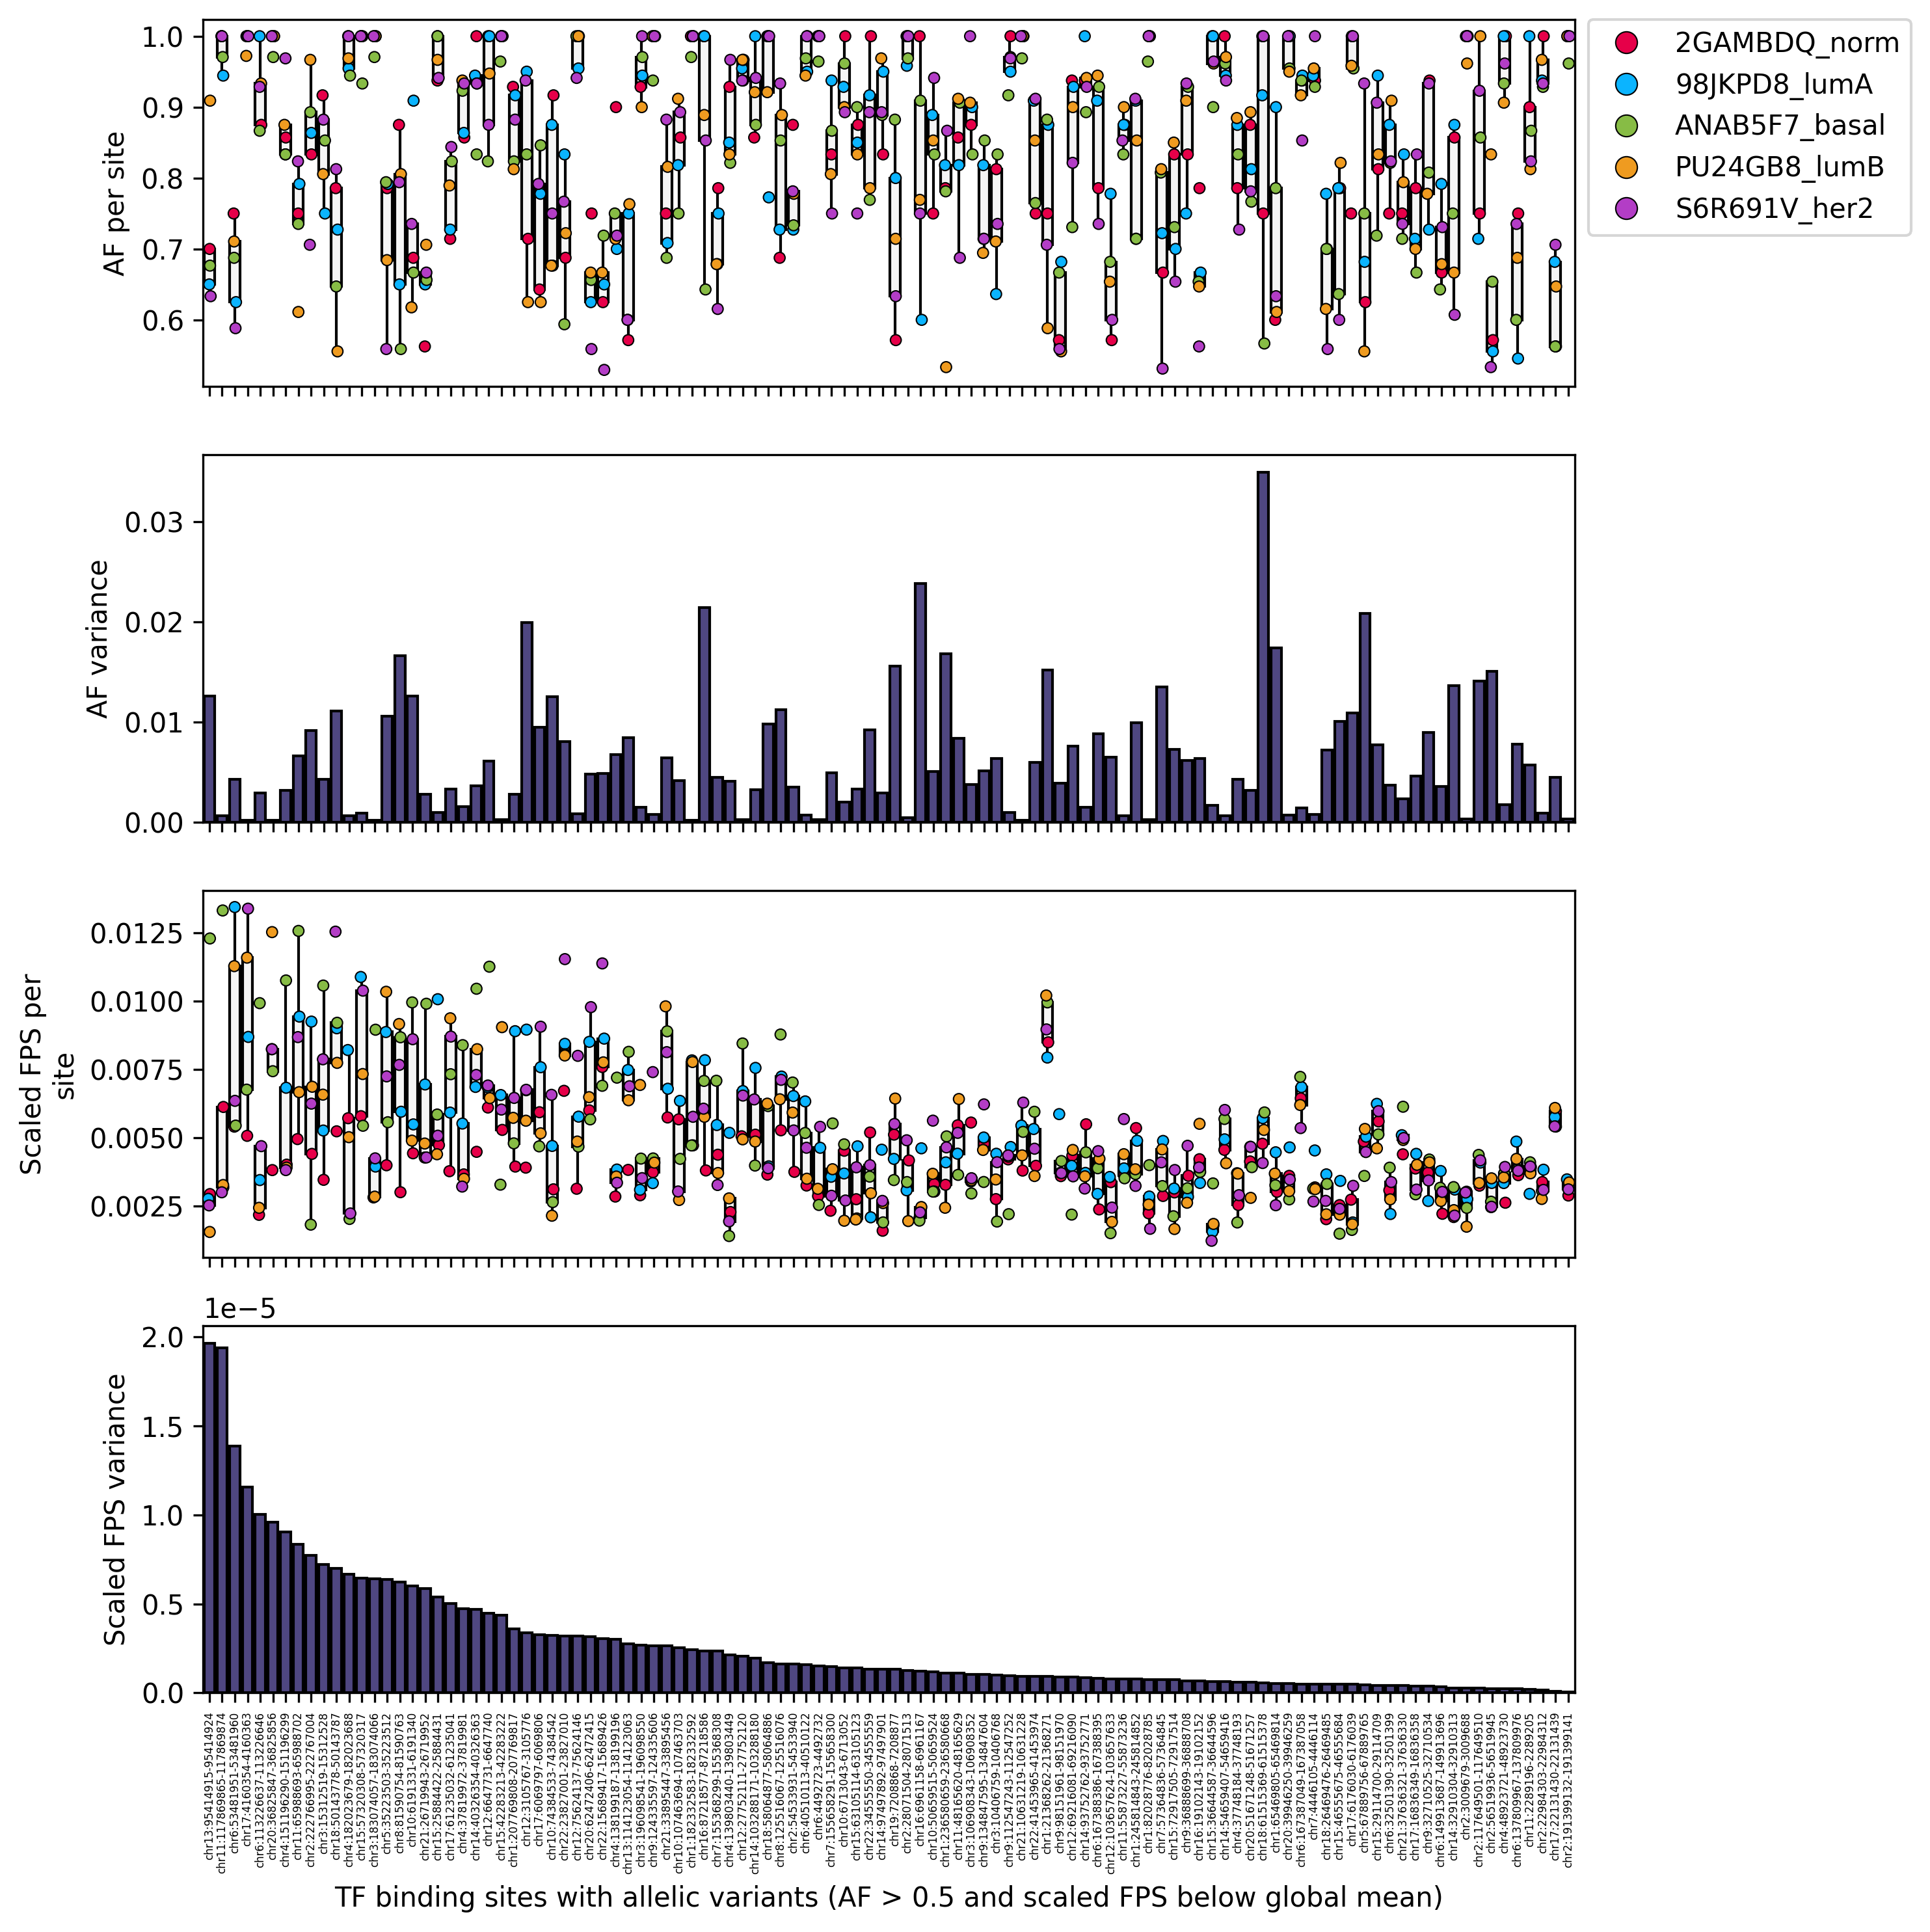

In [33]:
import textwrap
plt.figure(figsize=(10, 10), dpi=300)
# specify subplot
plt.subplot(4, 1, 1)
sns.boxplot(x='region_id', y='AF', data=hiaf_lofps_df, color='whitesmoke', linecolor='black', showfliers=False)
sns.stripplot(x='region_id', y='AF', data=hiaf_lofps_df, hue='sample_id', palette=dutchfield, size=4, jitter=True, linewidth=0.5, edgecolor='black')
plt.xticks(ticks=plt.xticks()[0], labels=[])
plt.xlabel('')
ylabel = textwrap.fill('AF per site', width=15)
plt.ylabel(ylabel, fontsize=10)
# place legend outside of the plot
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0, markerscale=2, fontsize=10)

plt.subplot(4, 1, 2)
sns.barplot(x='region_id', y='AF_var', data=hiaf_lofps_df, color='darkslateblue', edgecolor='black')
plt.xticks(ticks=plt.xticks()[0], labels=[])
plt.xlabel('')
ylabel = textwrap.fill('AF variance', width=15)
plt.ylabel(ylabel, fontsize=10)

plt.subplot(4, 1, 3)
sns.boxplot(x='region_id', y='FPS_scaled', data=hiaf_lofps_df, color='whitesmoke', linecolor='black', showfliers=False)
sns.stripplot(x='region_id', y='FPS_scaled', data=hiaf_lofps_df, hue='sample_id', palette=dutchfield, size=4, jitter=True, legend=False, linewidth=0.5, edgecolor='black')
plt.xticks(ticks=plt.xticks()[0], labels=[])
plt.xlabel('')
ylabel = textwrap.fill('Scaled FPS per site', width=15)
plt.ylabel(ylabel, fontsize=10)

plt.subplot(4, 1, 4)
sns.barplot(x='region_id', y='FPS_scaled_var', data=hiaf_lofps_df, color='darkslateblue', edgecolor='black')
plt.xticks(rotation=90, fontsize=4)
plt.xlabel(f'TF binding sites with allelic variants (AF > 0.5 and scaled FPS below global mean)', fontsize=10)
plt.ylabel('Scaled FPS variance', fontsize=10)
plt.subplots_adjust(hspace=0.05) 
plt.tight_layout()
plt.show()

In [34]:
# now load the LO AF HI FPS regions

loaf_hifps_df = pd.read_csv('/data5/msazizan/plotting_data/plotting-v8-mean/output_data/tables/AHR_AHR_HUMAN.H11MO.0.B/AHR_AHR_HUMAN.H11MO.0.B_LO_AF_regs_GT_FPS-mean_sorted_by_FPS_var_table.tsv', sep='\t')
loaf_hifps_df

region_id      sample_id        AF      FPS  FPS_scaled  \
0     chr8:41828326-41828335   2GAMBDQ_norm  0.312500  0.58121    0.107841   
1     chr8:41828326-41828335   98JKPD8_lumA  0.291667  1.21392    0.340264   
2     chr8:41828326-41828335  ANAB5F7_basal  0.352941  0.66781    0.204627   
3     chr8:41828326-41828335   PU24GB8_lumB  0.342105  0.89861    0.211023   
4     chr8:41828326-41828335   S6R691V_her2  0.294118  0.70965    0.195309   
..                       ...            ...       ...      ...         ...   
255  chr20:53829880-53829889   2GAMBDQ_norm  0.062500  0.08741    0.016219   
256  chr20:53829880-53829889   98JKPD8_lumA  0.100000  0.08771    0.024585   
257  chr20:53829880-53829889  ANAB5F7_basal  0.117647  0.07282    0.022313   
258  chr20:53829880-53829889   PU24GB8_lumB  0.052632  0.10455    0.024552   
259  chr20:53829880-53829889   S6R691V_her2  0.058824  0.07025    0.019334   

      FPS_var  FPS_scaled_var    AF_var  
0    0.063387        0.006909  0.000773  
1    0.063387        0.006909  0.000773  
2    0.063387        0.006909  0.000773  
3    0.063387        0.006909  0.000773  
4    0.063387        0.006909  0.000773  
..        ...             ...       ...  
255  0.000190        0.000013  0.000827  
256  0.000190        0.000013  0.000827  
257  0.000190        0.000013  0.000827  
258  0.000190        0.000013  0.000827  
259  0.000190        0.000013  0.000827  

[260 rows x 8 columns]

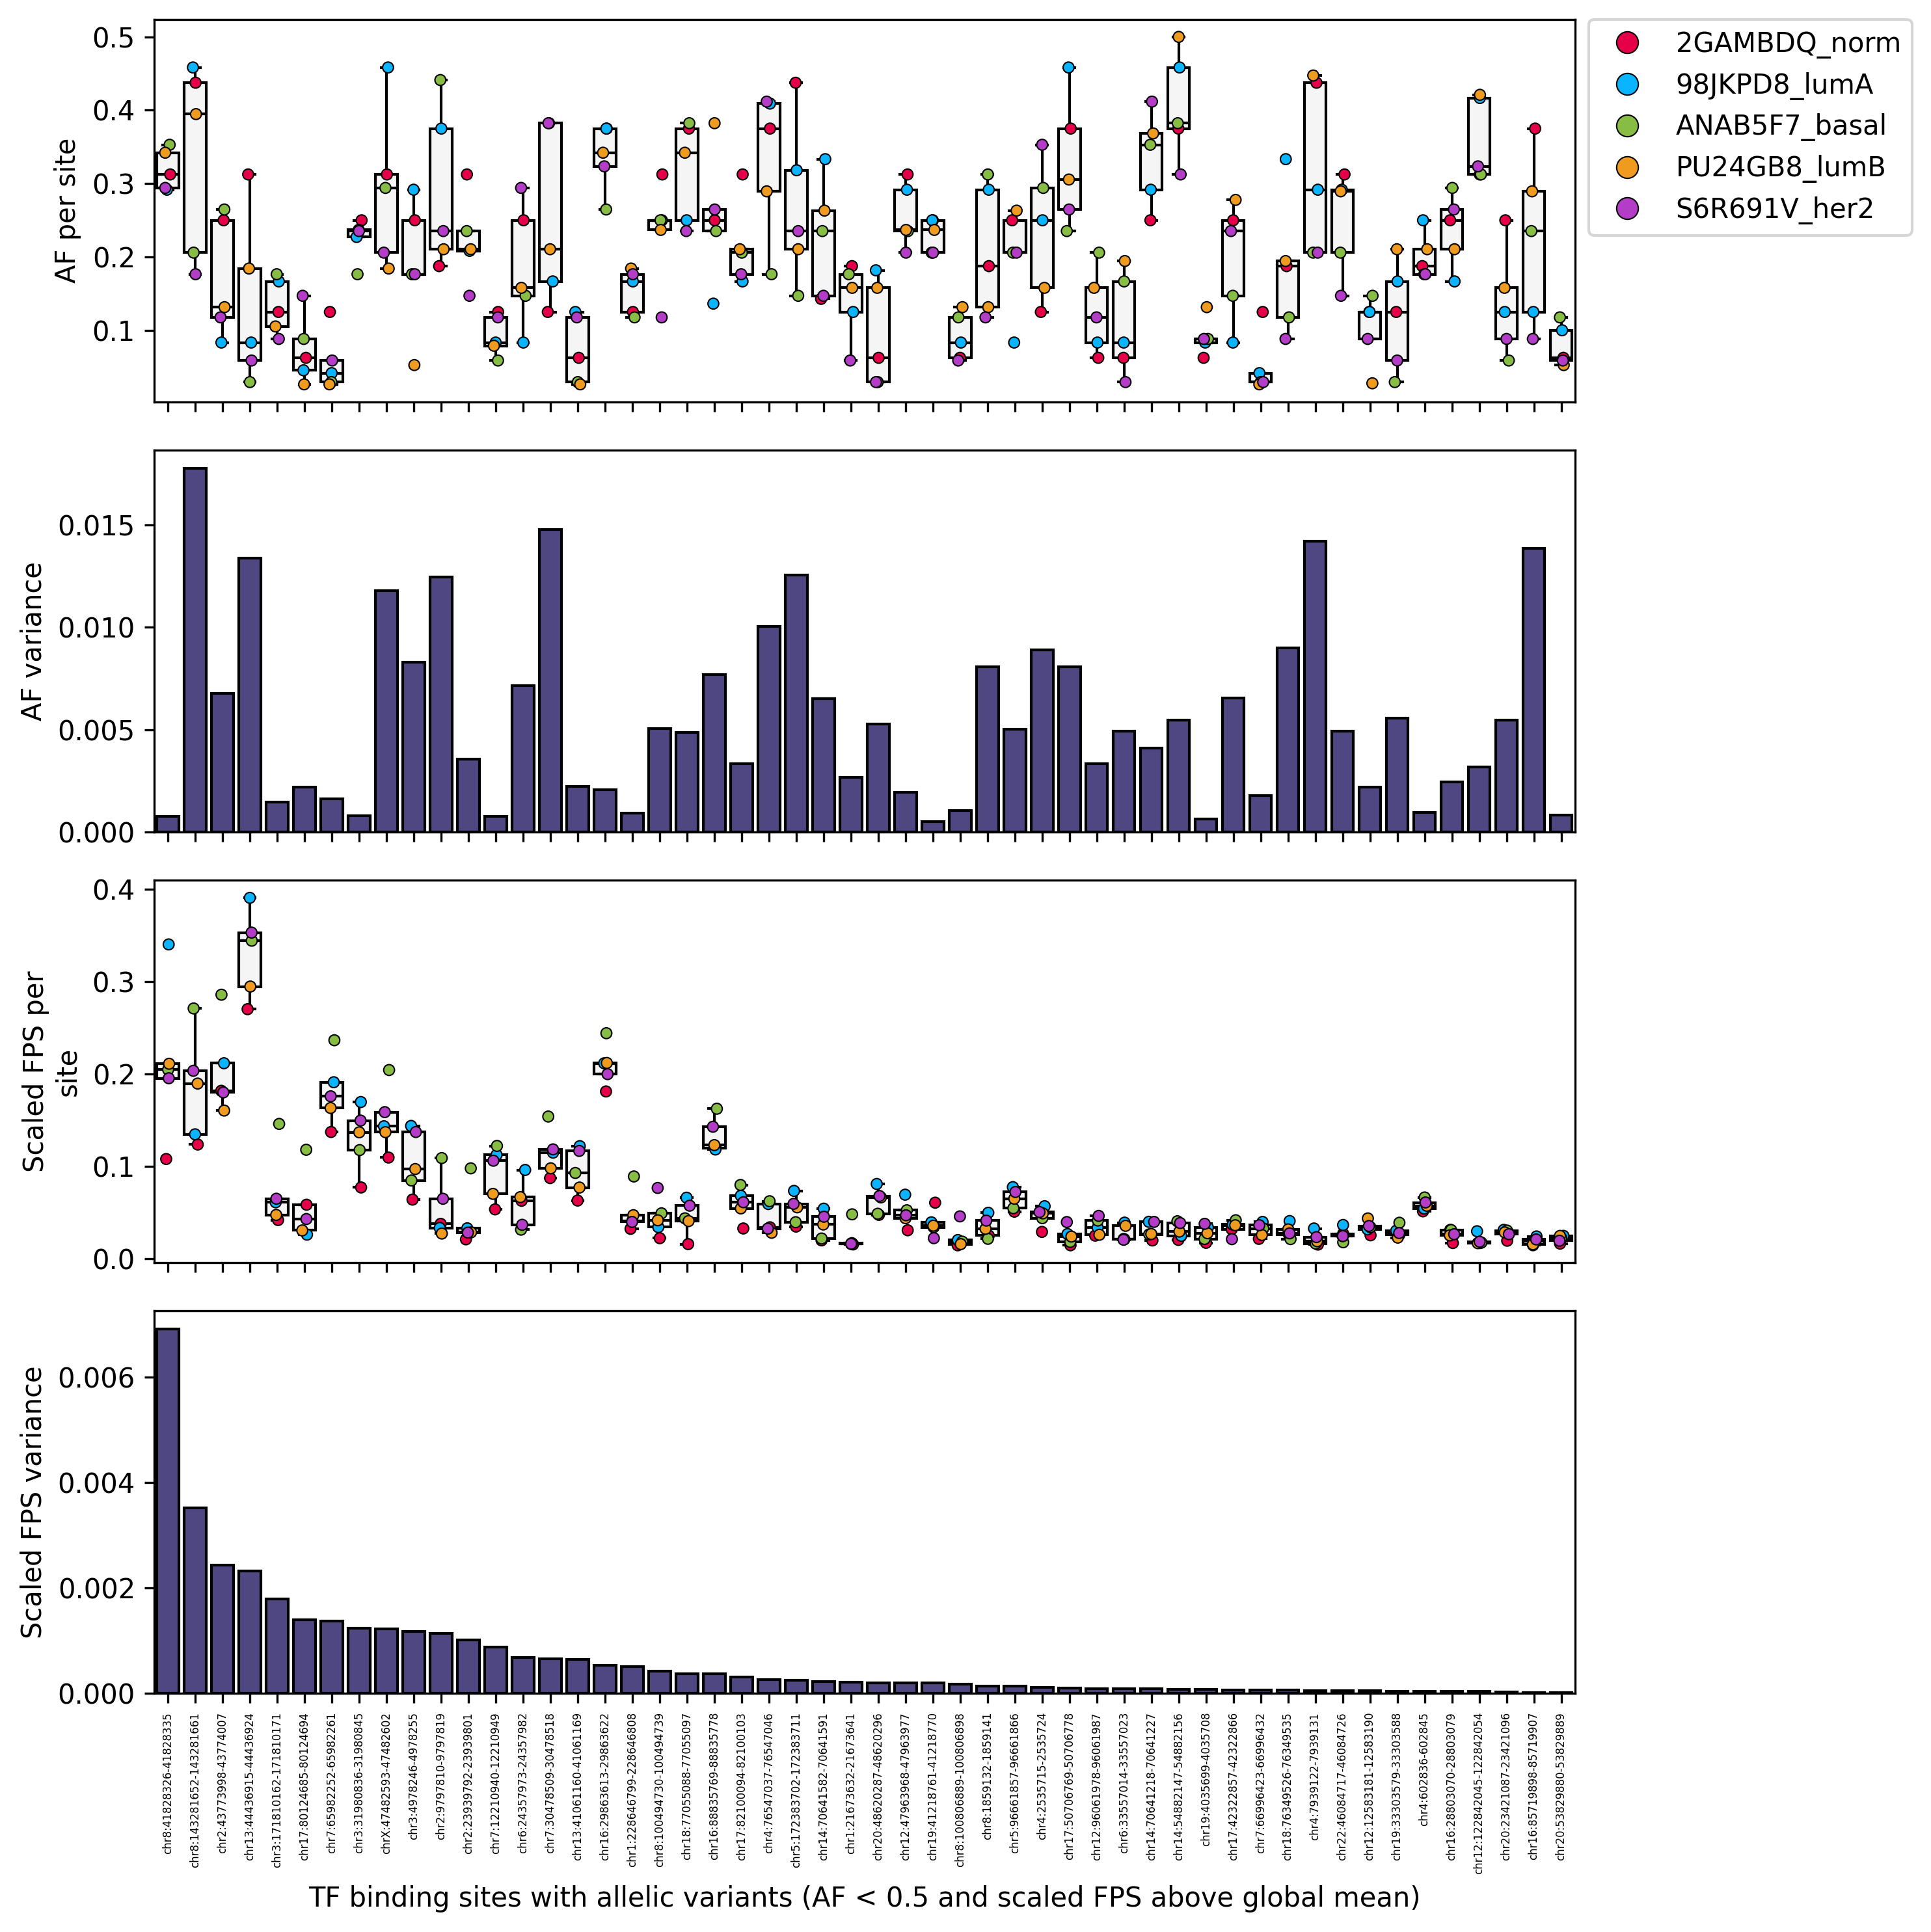

In [37]:
import textwrap
plt.figure(figsize=(10, 10), dpi=300)
# specify subplot
plt.subplot(4, 1, 1)
sns.boxplot(x='region_id', y='AF', data=loaf_hifps_df, color='whitesmoke', linecolor='black', showfliers=False)
sns.stripplot(x='region_id', y='AF', data=loaf_hifps_df, hue='sample_id', palette=dutchfield, size=4, jitter=True, linewidth=0.5, edgecolor='black')
plt.xticks(ticks=plt.xticks()[0], labels=[])
plt.xlabel('')
ylabel = textwrap.fill('AF per site', width=15)
plt.ylabel(ylabel, fontsize=10)
# place legend outside of the plot
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0, markerscale=2, fontsize=10)

plt.subplot(4, 1, 2)
sns.barplot(x='region_id', y='AF_var', data=loaf_hifps_df, color='darkslateblue', edgecolor='black')
plt.xticks(ticks=plt.xticks()[0], labels=[])
plt.xlabel('')
ylabel = textwrap.fill('AF variance', width=15)
plt.ylabel(ylabel, fontsize=10)

plt.subplot(4, 1, 3)
sns.boxplot(x='region_id', y='FPS_scaled', data=loaf_hifps_df, color='whitesmoke', linecolor='black', showfliers=False)
sns.stripplot(x='region_id', y='FPS_scaled', data=loaf_hifps_df, hue='sample_id', palette=dutchfield, size=4, jitter=True, legend=False, linewidth=0.5, edgecolor='black')
plt.xticks(ticks=plt.xticks()[0], labels=[])
plt.xlabel('')
ylabel = textwrap.fill('Scaled FPS per site', width=15)
plt.ylabel(ylabel, fontsize=10)

plt.subplot(4, 1, 4)
sns.barplot(x='region_id', y='FPS_scaled_var', data=loaf_hifps_df, color='darkslateblue', edgecolor='black')
plt.xticks(rotation=90, fontsize=4)
plt.xlabel(f'TF binding sites with allelic variants (AF < 0.5 and scaled FPS above global mean)', fontsize=10)
plt.ylabel('Scaled FPS variance', fontsize=10)
plt.subplots_adjust(hspace=0.05) 
plt.tight_layout()
plt.show()

In [35]:
# now load the LO AF LO FPS regions

loaf_lofps_df = pd.read_csv('/data5/msazizan/plotting_data/plotting-v8-mean/output_data/tables/AHR_AHR_HUMAN.H11MO.0.B/AHR_AHR_HUMAN.H11MO.0.B_LO_AF_regs_LT_FPS-mean_sorted_by_FPS_var_table.tsv', sep='\t')
loaf_lofps_df

region_id      sample_id        AF      FPS  FPS_scaled  \
0     chr13:24201582-24201591   2GAMBDQ_norm  0.125000  0.02493    0.004626   
1     chr13:24201582-24201591   98JKPD8_lumA  0.375000  0.03165    0.008872   
2     chr13:24201582-24201591  ANAB5F7_basal  0.038462  0.00903    0.002767   
3     chr13:24201582-24201591   PU24GB8_lumB  0.125000  0.04085    0.009593   
4     chr13:24201582-24201591   S6R691V_her2  0.147059  0.04786    0.013172   
...                       ...            ...       ...      ...         ...   
1220   chr7:27044223-27044232   2GAMBDQ_norm  0.250000  0.01795    0.003331   
1221   chr7:27044223-27044232   98JKPD8_lumA  0.300000  0.01121    0.003142   
1222   chr7:27044223-27044232  ANAB5F7_basal  0.083333  0.01018    0.003119   
1223   chr7:27044223-27044232   PU24GB8_lumB  0.142857  0.01376    0.003231   
1224   chr7:27044223-27044232   S6R691V_her2  0.156250  0.01227    0.003377   

       FPS_var  FPS_scaled_var    AF_var  
0     0.000225    1.715716e-05  0.015898  
1     0.000225    1.715716e-05  0.015898  
2     0.000225    1.715716e-05  0.015898  
3     0.000225    1.715716e-05  0.015898  
4     0.000225    1.715716e-05  0.015898  
...        ...             ...       ...  
1220  0.000009    1.278907e-08  0.007594  
1221  0.000009    1.278907e-08  0.007594  
1222  0.000009    1.278907e-08  0.007594  
1223  0.000009    1.278907e-08  0.007594  
1224  0.000009    1.278907e-08  0.007594  

[1225 rows x 8 columns]

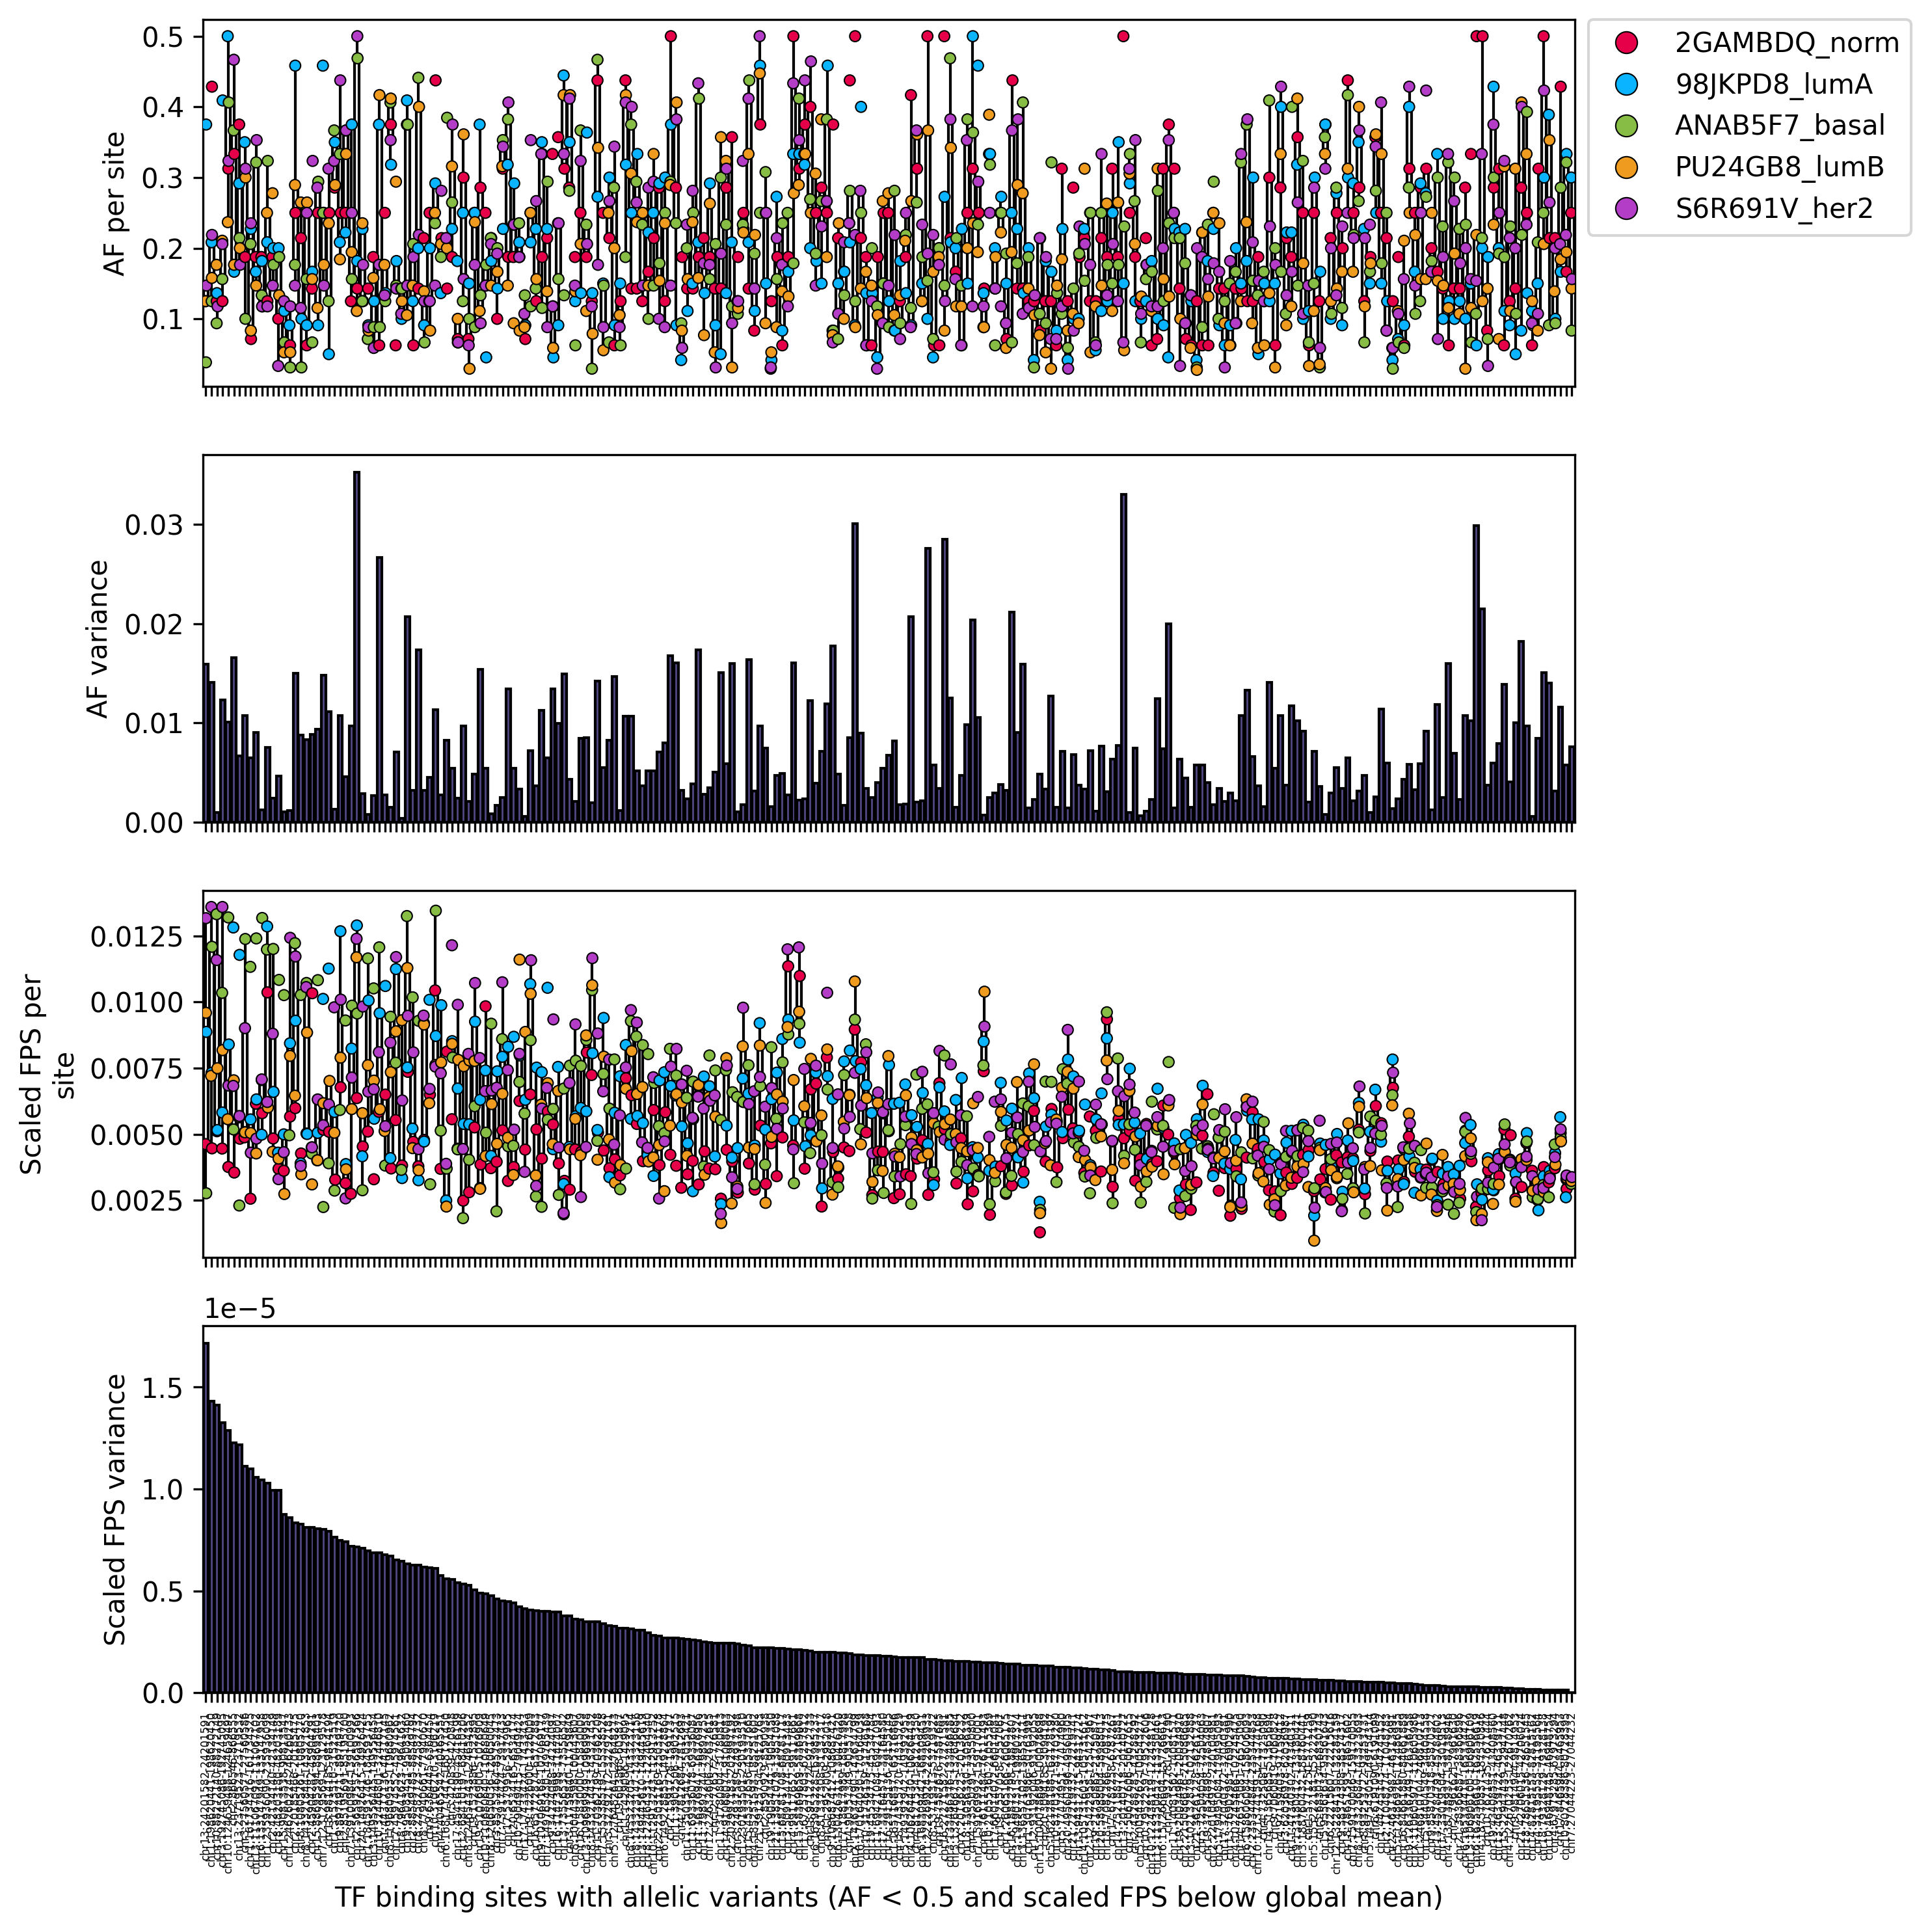

In [38]:
import textwrap
plt.figure(figsize=(10, 10), dpi=300)
# specify subplot
plt.subplot(4, 1, 1)
sns.boxplot(x='region_id', y='AF', data=loaf_lofps_df, color='whitesmoke', linecolor='black', showfliers=False)
sns.stripplot(x='region_id', y='AF', data=loaf_lofps_df, hue='sample_id', palette=dutchfield, size=4, jitter=True, linewidth=0.5, edgecolor='black')
plt.xticks(ticks=plt.xticks()[0], labels=[])
plt.xlabel('')
ylabel = textwrap.fill('AF per site', width=15)
plt.ylabel(ylabel, fontsize=10)
# place legend outside of the plot
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0, markerscale=2, fontsize=10)

plt.subplot(4, 1, 2)
sns.barplot(x='region_id', y='AF_var', data=loaf_lofps_df, color='darkslateblue', edgecolor='black')
plt.xticks(ticks=plt.xticks()[0], labels=[])
plt.xlabel('')
ylabel = textwrap.fill('AF variance', width=15)
plt.ylabel(ylabel, fontsize=10)

plt.subplot(4, 1, 3)
sns.boxplot(x='region_id', y='FPS_scaled', data=loaf_lofps_df, color='whitesmoke', linecolor='black', showfliers=False)
sns.stripplot(x='region_id', y='FPS_scaled', data=loaf_lofps_df, hue='sample_id', palette=dutchfield, size=4, jitter=True, legend=False, linewidth=0.5, edgecolor='black')
plt.xticks(ticks=plt.xticks()[0], labels=[])
plt.xlabel('')
ylabel = textwrap.fill('Scaled FPS per site', width=15)
plt.ylabel(ylabel, fontsize=10)

plt.subplot(4, 1, 4)
sns.barplot(x='region_id', y='FPS_scaled_var', data=loaf_lofps_df, color='darkslateblue', edgecolor='black')
plt.xticks(rotation=90, fontsize=4)
plt.xlabel(f'TF binding sites with allelic variants (AF < 0.5 and scaled FPS below global mean)', fontsize=10)
plt.ylabel('Scaled FPS variance', fontsize=10)
plt.subplots_adjust(hspace=0.05) 
plt.tight_layout()
plt.show()

In [40]:
# get the unique counts of region_id
hiaf_hifps_df['region_id'].nunique()
print(f'There are {hiaf_hifps_df["region_id"].nunique()} unique region_ids in the HI AF HI FPS table')
hiaf_lofps_df['region_id'].nunique()
print(f'There are {hiaf_lofps_df["region_id"].nunique()} unique region_ids in the HI AF LO FPS table')
loaf_hifps_df['region_id'].nunique()
print(f'There are {loaf_hifps_df["region_id"].nunique()} unique region_ids in the LO AF HI FPS table')
loaf_lofps_df['region_id'].nunique()
print(f'There are {loaf_lofps_df["region_id"].nunique()} unique region_ids in the LO AF LO FPS table')

There are 15 unique region_ids in the HI AF HI FPS table
There are 108 unique region_ids in the HI AF LO FPS table
There are 52 unique region_ids in the LO AF HI FPS table
There are 245 unique region_ids in the LO AF LO FPS table


In [41]:
# create a 2x2 contingency matrix
def create_contingency_table(df1, df2, df3, df4):
    # Get the unique counts
    hi_af_hi_fps = df1['region_id'].nunique()
    print(f'There are {hi_af_hi_fps} unique region_ids in the HI AF HI FPS table')
    hi_af_lo_fps = df2['region_id'].nunique()
    print(f'There are {hi_af_lo_fps} unique region_ids in the HI AF LO FPS table')
    lo_af_hi_fps = df3['region_id'].nunique()
    print(f'There are {lo_af_hi_fps} unique region_ids in the LO AF HI FPS table')
    lo_af_lo_fps = df4['region_id'].nunique()
    print(f'There are {lo_af_lo_fps} unique region_ids in the LO AF LO FPS table')

    # Define the data
    data = {'HI-FPS': [hi_af_hi_fps, lo_af_hi_fps], 'LO-FPS': [hi_af_lo_fps, lo_af_lo_fps]}

    # Create the DataFrame and set the index
    df = pd.DataFrame(data, index=['HI-AF', 'LO-AF'])

    return df


In [42]:
contingency_df = create_contingency_table(hiaf_hifps_df, hiaf_lofps_df, loaf_hifps_df, loaf_lofps_df)
contingency_df

HI FPS  LO FPS
HI AF      15     108
LO AF      52     245

In [45]:
import scipy.stats as stats
statistic, pval = stats.fisher_exact(contingency_df)
print(f'The p-value is {pval}')

The p-value is 0.19059515475616076


In [ ]:
fishexact_df = pd.read_csv('/data5/msazizan/plotting_data/plotting-v8-mean/output_data/tables/AHR_AHR_HUMAN.H11MO.0.B/AHR_AHR_HUMAN.H11MO.0.B_fisher_exact_test.tsv', sep='\t')